# **PREDIKSI STUNTING**




#**1. LOAD DATA**

From this dataset, we analysed and built a prediction model to determine whether someone has a risk of stunting or not.

In [1]:
# Load library yang diperlukan
import pandas as pd

In [2]:
# Muat data dari Google Sheets
df = pd.read_csv('https://docs.google.com/spreadsheets/d/1bP7kO-Duv-wTeQN-Vzi39W-HVLDy6BmM/export?format=csv')

In [3]:
# Display data
df

,IDRT,IDART,W_ruta,W_balita,PSU,STRATA,B1R1,provkab,B1R5,NART,...,B4K9_ayah,B4K10_ayah,B4K11_ayah,HAZ,WAZ,WHZ,stunting,underweight,wasting,overweight
0,114171,303853,"119,90","276,73",12800,33012,33,3301,2,4.0,...,5.0,0.0,1.0,"-2,60","-1,63","0,00","1,00","2,00","2,00","2,00"
1,114172,78611,"119,90","261,41",12800,33012,33,3301,2,4.0,...,5.0,0.0,32.0,"-0,48","-1,59","-1,84","2,00","2,00","2,00","2,00"
2,114173,28591,"119,90","276,73",12800,33012,33,3301,2,4.0,...,5.0,0.0,32.0,"-0,02","0,93","1,30","2,00","2,00","2,00","2,00"
3,114174,56051,"119,90","261,41",12800,33012,33,3301,2,6.0,...,9.0,0.0,2.0,"-2,52","0,28","2,02","1,00","2,00","2,00","1,00"
4,114174,54411,"119,90","261,41",12800,33012,33,3301,2,5.0,...,9.0,0.0,2.0,"-2,31","-1,10","0,09","1,00","2,00","2,00","2,00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25795,138963,265605,"29,42","29,52",15348,33761,33,3376,1,6.0,...,7.0,0.0,1.0,"-1,67","-1,43","-0,63","2,00","2,00","2,00","2,00"
25796,138964,1692,"29,42","29,32",15348,33761,33,3376,1,3.0,...,8.0,0.0,1.0,"0,92","-0,11","-1,72","2,00","2,00","2,00","2,00"
25797,138965,252316,"29,42","29,52",15348,33761,33,3376,1,3.0,...,8.0,0.0,1.0,"-2,05","-1,97","-1,15","1,00","2,00","2,00","2,00"
25798,138966,188592,"29,42","29,32",15348,33761,33,3376,1,5.0,...,8.0,0.0,32.0,"-1,11","-1,68","-1,54","2,00","2,00","2,00","2,00"


#**2. EDA**

In [4]:
# Display an information of the dataset file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25800 entries, 0 to 25799
Data columns (total 67 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   IDRT          25800 non-null  int64  
 1   IDART         25800 non-null  int64  
 2   W_ruta        25800 non-null  object 
 3   W_balita      25800 non-null  object 
 4   PSU           25800 non-null  int64  
 5   STRATA        25800 non-null  int64  
 6   B1R1          25800 non-null  int64  
 7   provkab       25800 non-null  int64  
 8   B1R5          25800 non-null  int64  
 9   NART          25798 non-null  float64
 10  PTEKS         25800 non-null  object 
 11  KBTEKS        25800 non-null  object 
 12  B4K3          25800 non-null  int64  
 13  B4K4          25800 non-null  int64  
 14  b4k7hr        25800 non-null  int64  
 15  b4k7bln       25800 non-null  int64  
 16  I01           25792 non-null  float64
 17  I04           25349 non-null  float64
 18  BB8R3         19423 non-nu

In [5]:
# Display a description of the dataset file
df.describe()

,IDRT,IDART,PSU,STRATA,B1R1,provkab,B1R5,NART,B4K3,B4K4,...,B4K11_KK,B4K1_ayah,B4K3_ayah,B4K4_ayah,B4K5_ayah,B4K7THN_ayah,B4K8_ayah,B4K9_ayah,B4K10_ayah,B4K11_ayah
count,25800.00000,25800.000000,25800.000000,25800.000000,25800.0,25800.000000,25800.000000,25798.000000,25800.000000,25800.000000,...,25800.000000,24255.000000,24255.000000,24255.0,24255.000000,24255.000000,24255.000000,24255.000000,24255.0,24255.000000
mean,126562.86845,155841.414767,14015.216822,33234.409884,33.0,3323.315775,1.252132,4.173037,3.373256,1.485543,...,9.532519,1.261266,1.339435,1.0,2.003834,36.032612,4.496228,5.403628,0.0,9.650423
std,7189.24325,91307.257606,760.509036,220.657284,0.0,22.075928,0.434245,1.061937,1.048155,0.499801,...,13.402644,0.848151,1.092649,0.0,0.092749,7.178419,1.188359,1.677716,0.0,14.562846
min,114171.00000,109.000000,12722.000000,33011.000000,33.0,3301.000000,1.000000,2.000000,3.000000,1.000000,...,-1.000000,1.000000,1.000000,1.0,0.000000,16.000000,1.000000,1.000000,0.0,-1.000000
25%,120333.50000,75801.500000,13352.000000,33091.000000,33.0,3309.000000,1.000000,3.000000,3.000000,1.000000,...,1.000000,1.000000,1.000000,1.0,2.000000,31.000000,4.000000,4.000000,0.0,1.000000
50%,126497.50000,156041.500000,14004.000000,33172.000000,33.0,3317.000000,1.000000,4.000000,3.000000,1.000000,...,2.000000,1.000000,1.000000,1.0,2.000000,35.000000,5.000000,5.000000,0.0,2.000000
75%,132867.25000,235017.250000,14675.250000,33261.000000,33.0,3326.000000,2.000000,5.000000,3.000000,2.000000,...,32.000000,1.000000,1.000000,1.0,2.000000,40.000000,5.000000,6.000000,0.0,32.000000
max,138967.00000,314120.000000,15357.000000,33761.000000,33.0,3376.000000,2.000000,14.000000,10.000000,2.000000,...,32.000000,11.000000,10.000000,1.0,4.000000,146.000000,7.000000,9.000000,0.0,888.000000


##**2.1 Data Distribution**

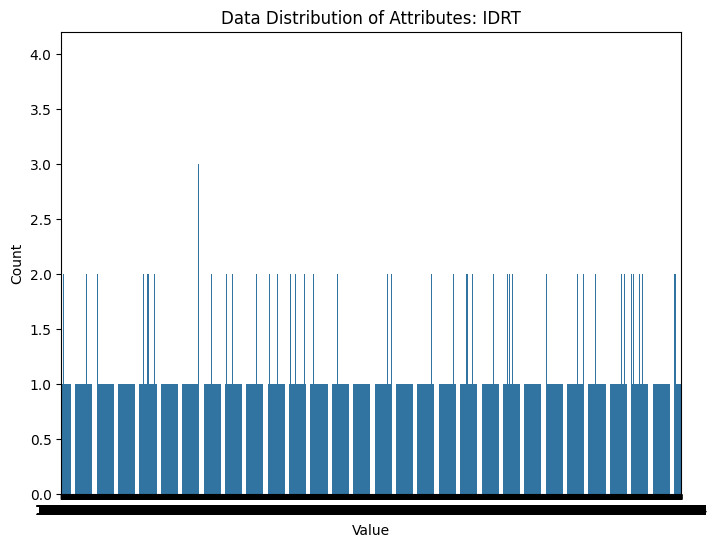

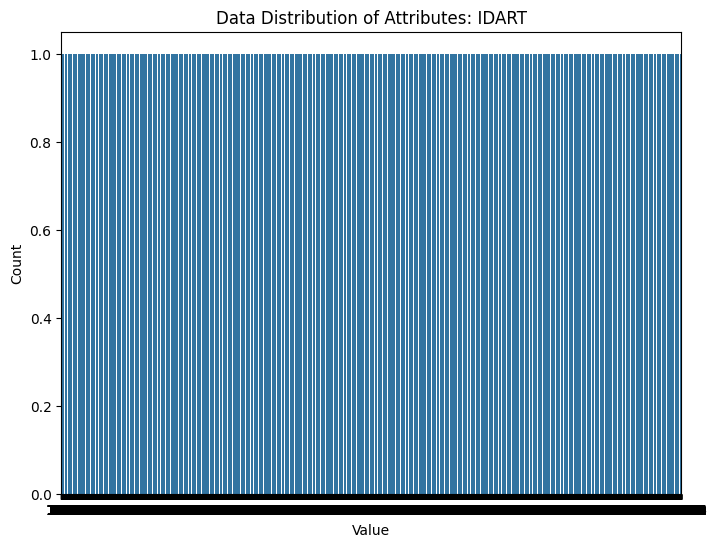

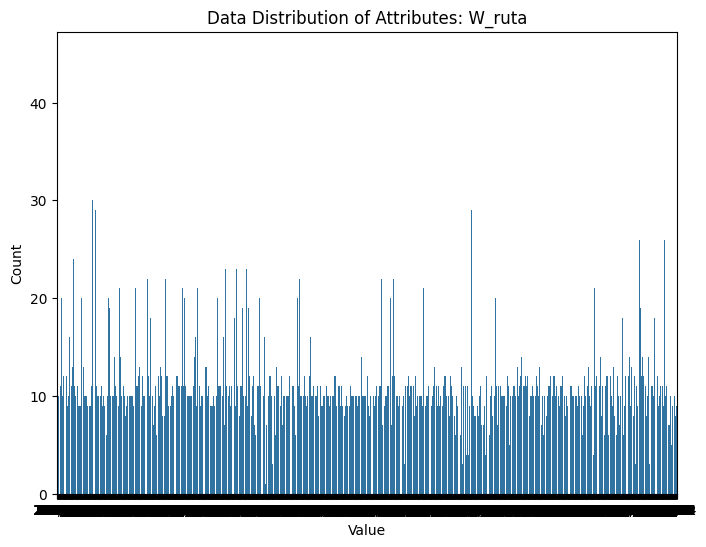

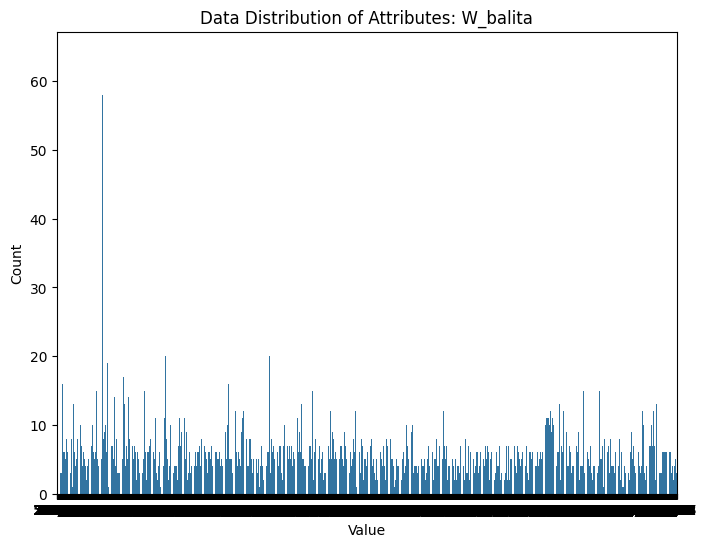

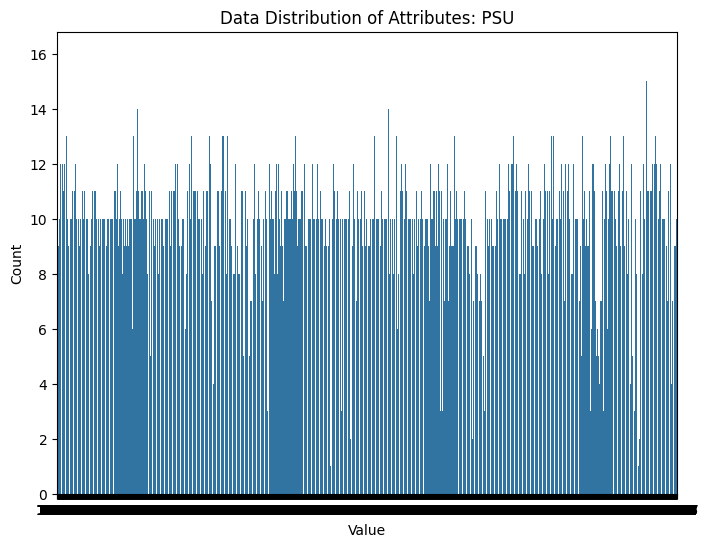

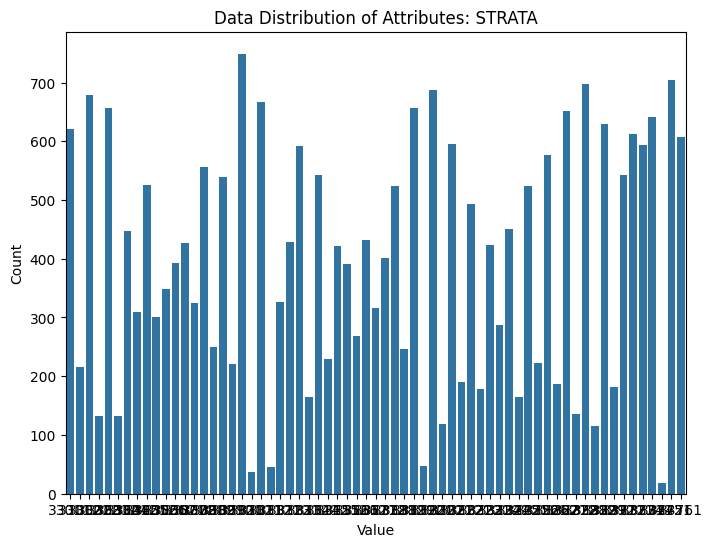

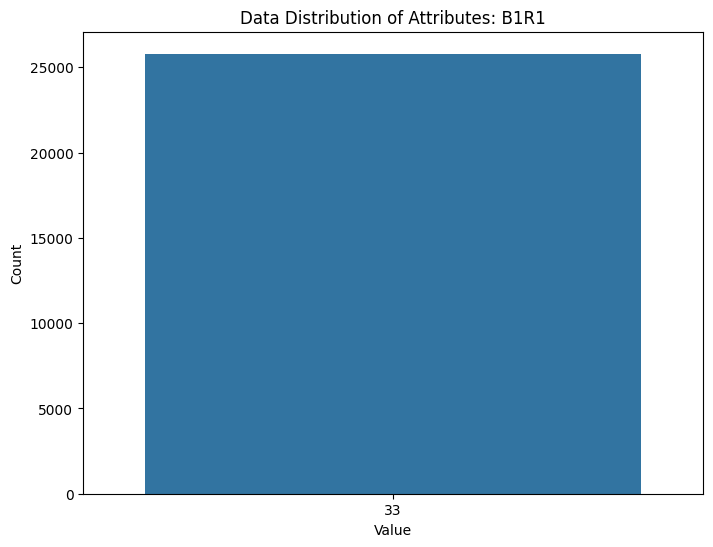

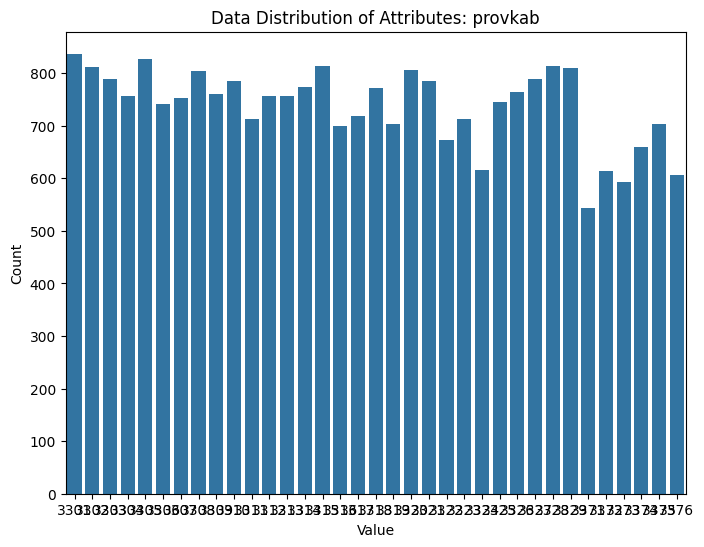

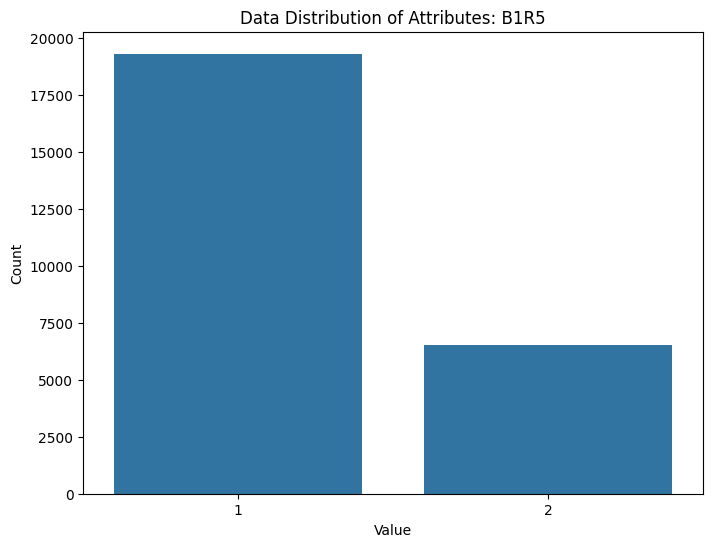

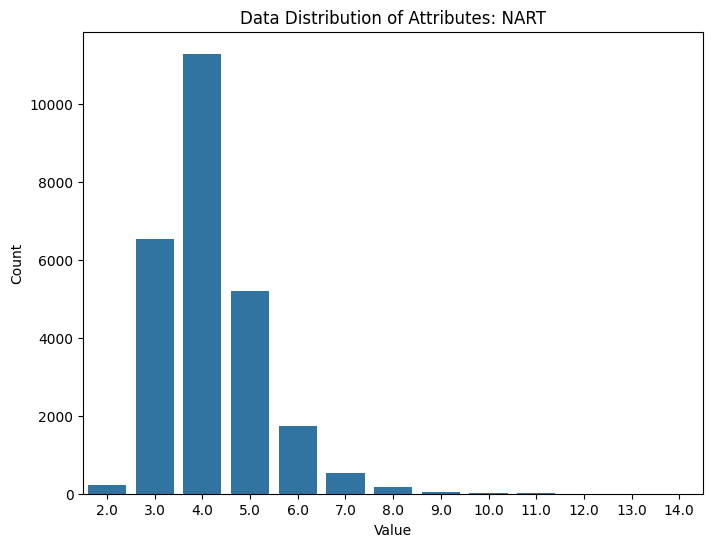

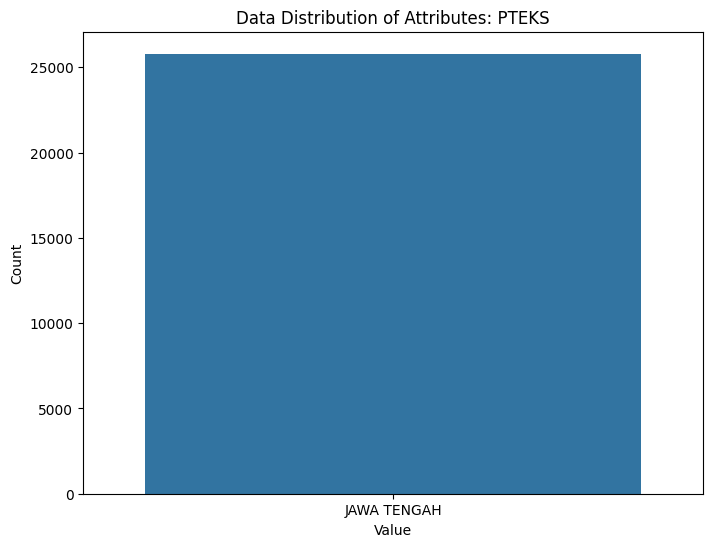

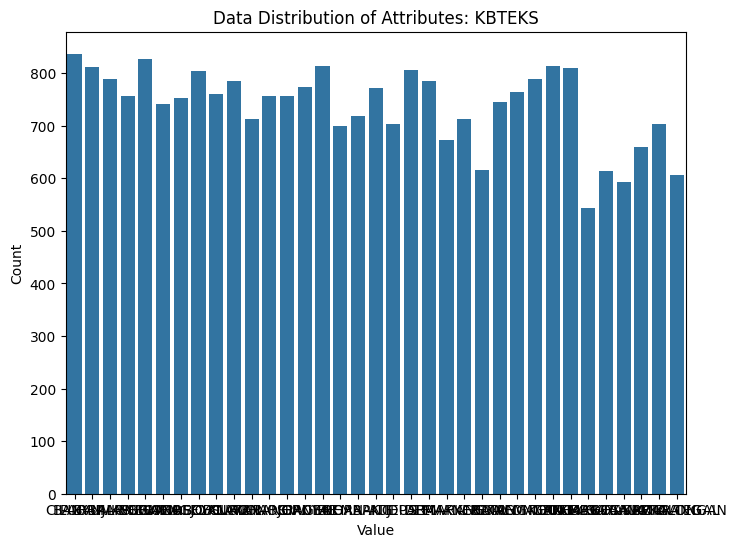

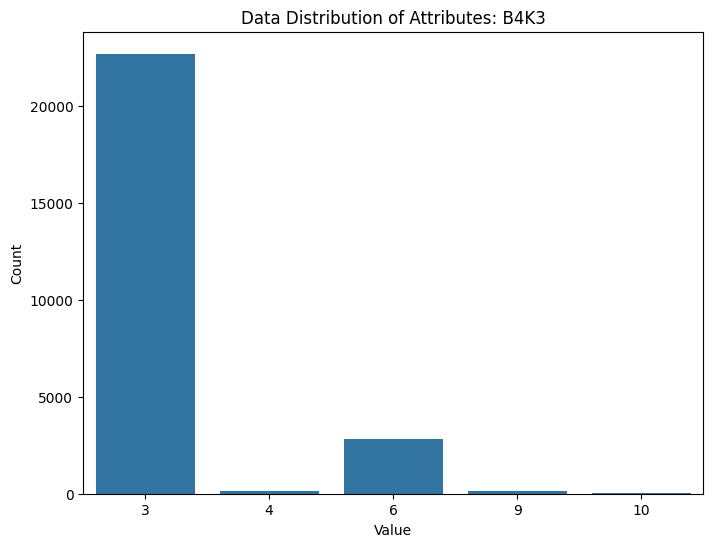

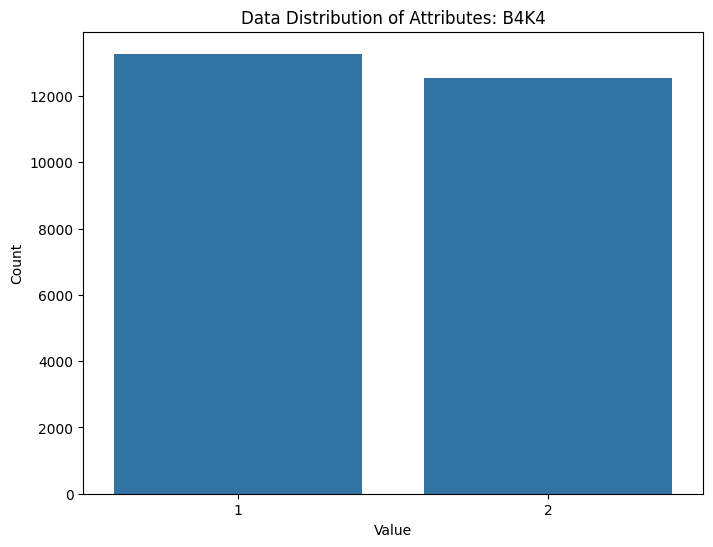

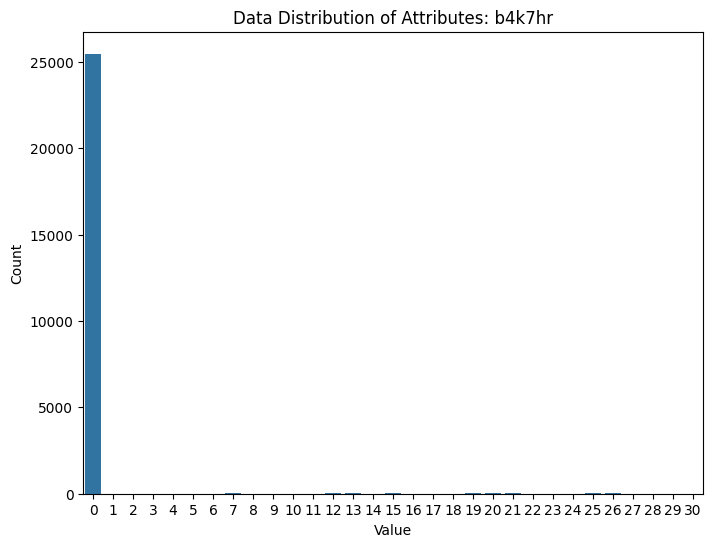

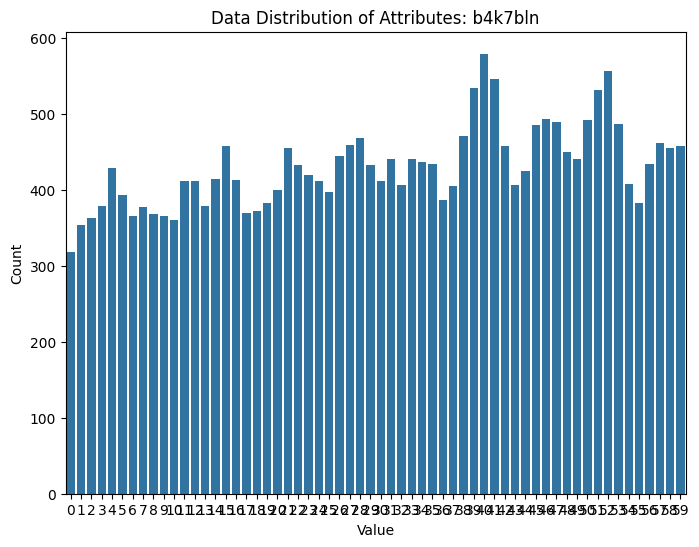

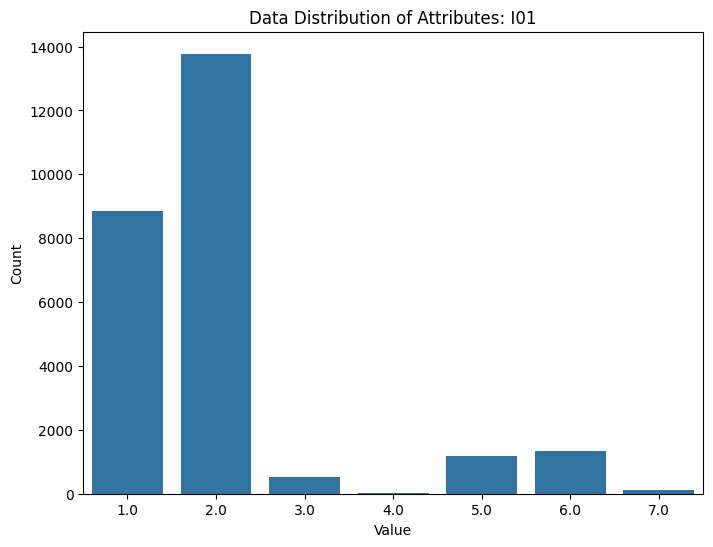

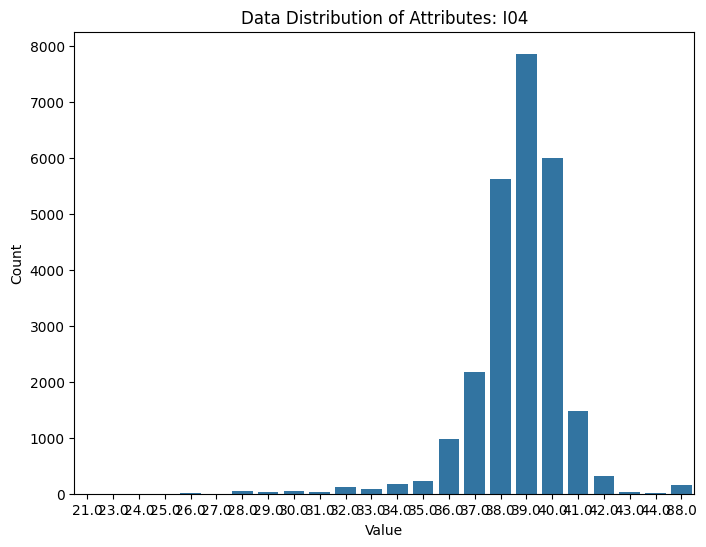

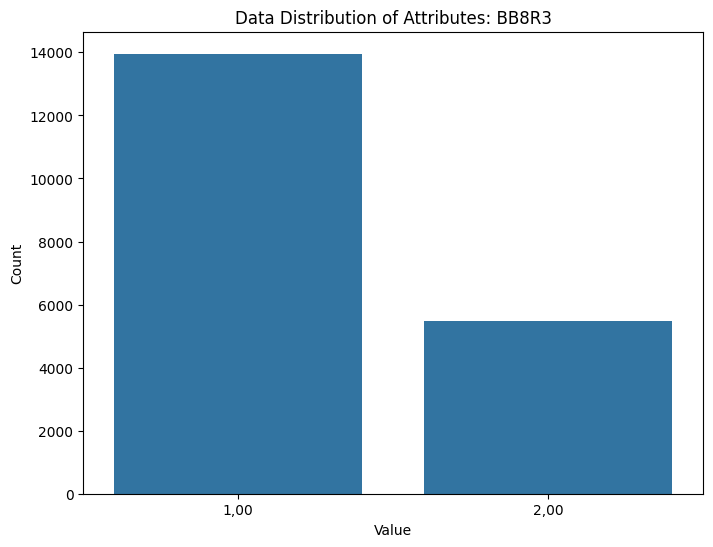

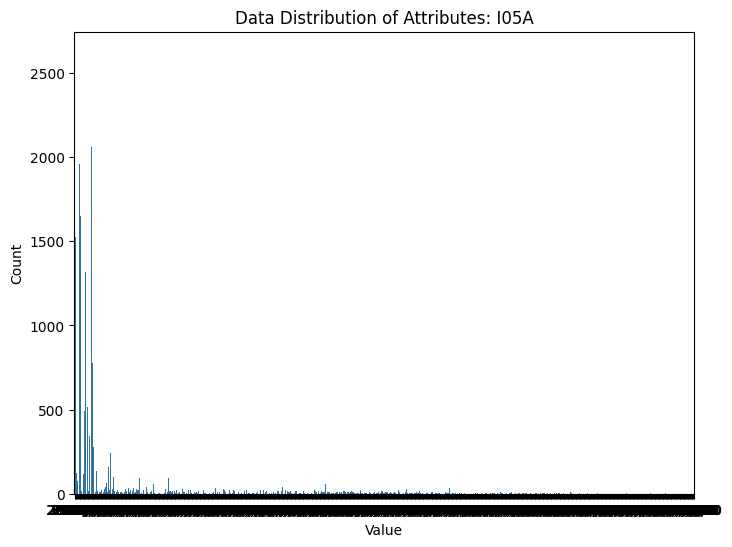

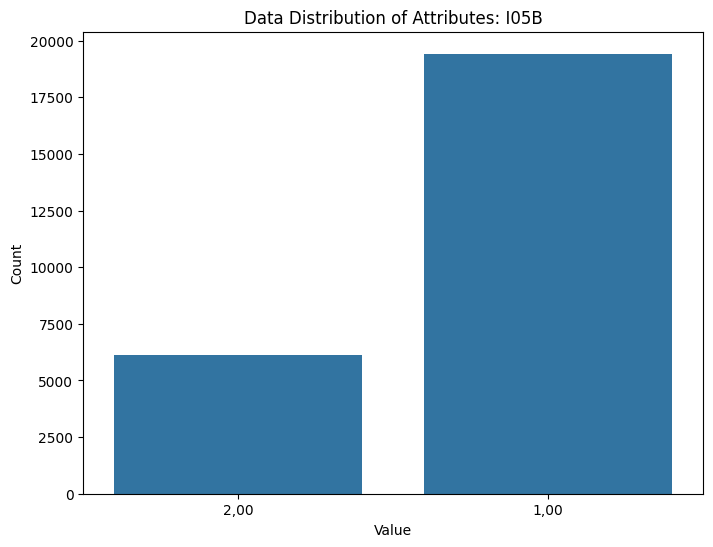

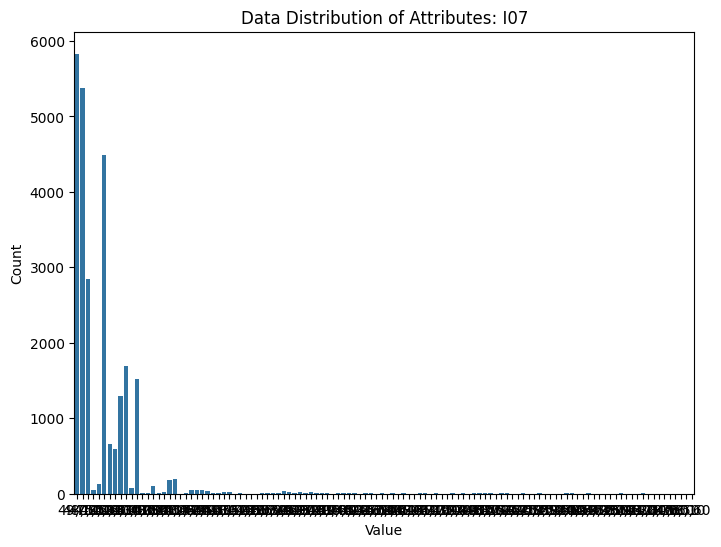

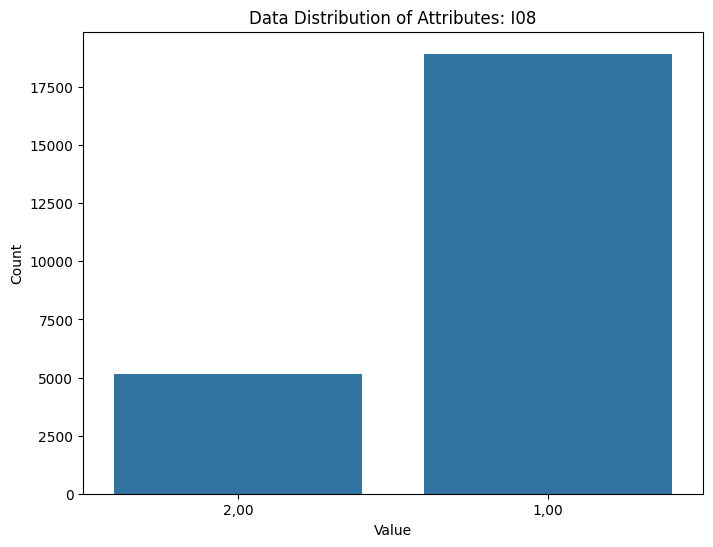

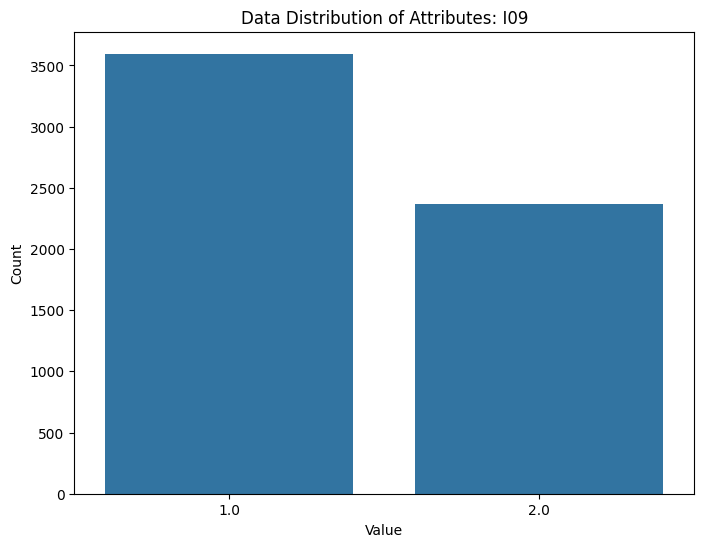

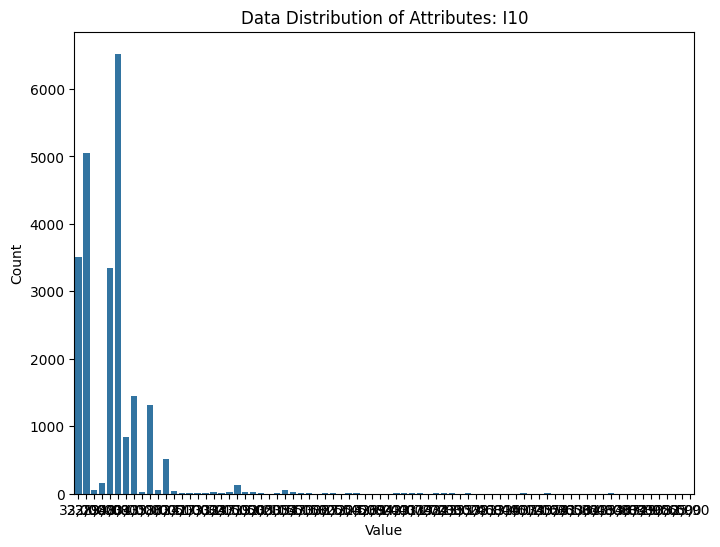

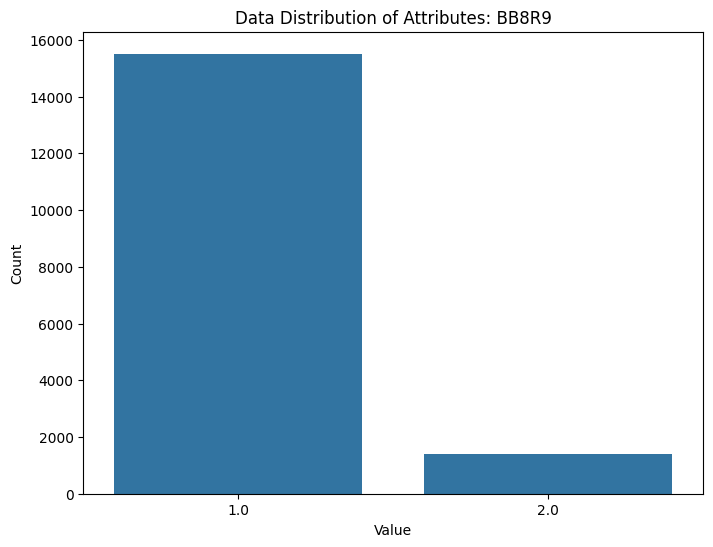

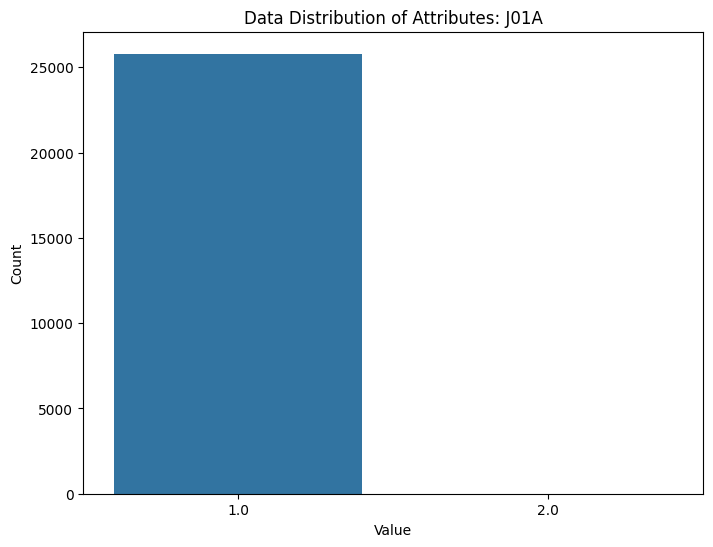

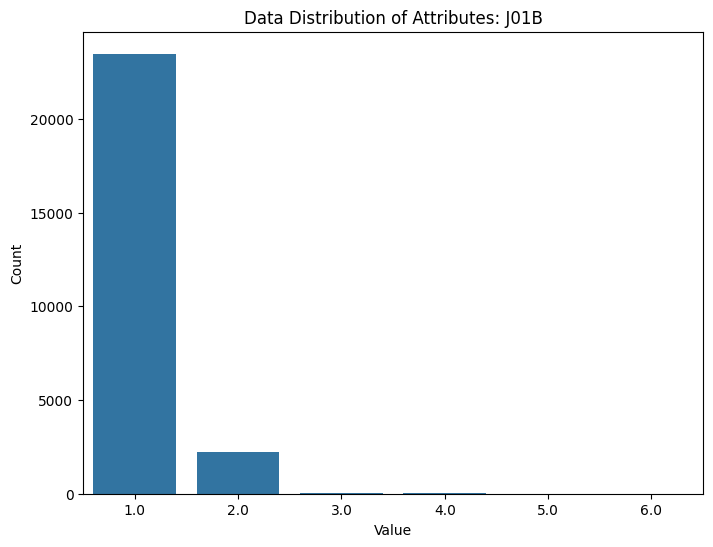

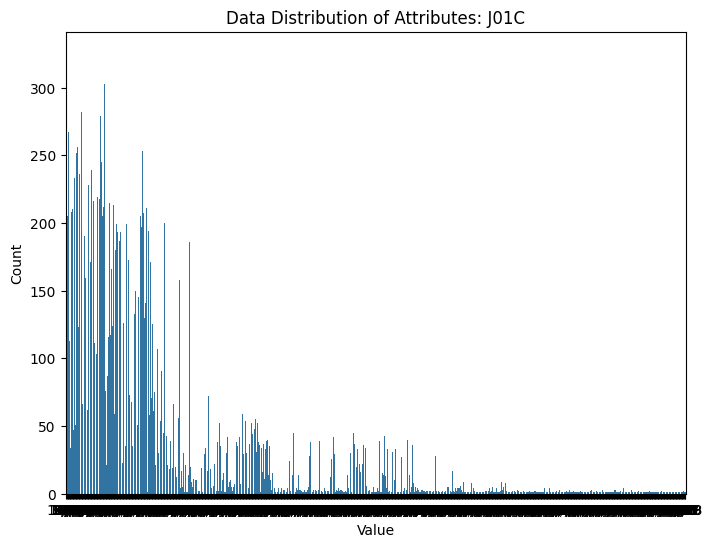

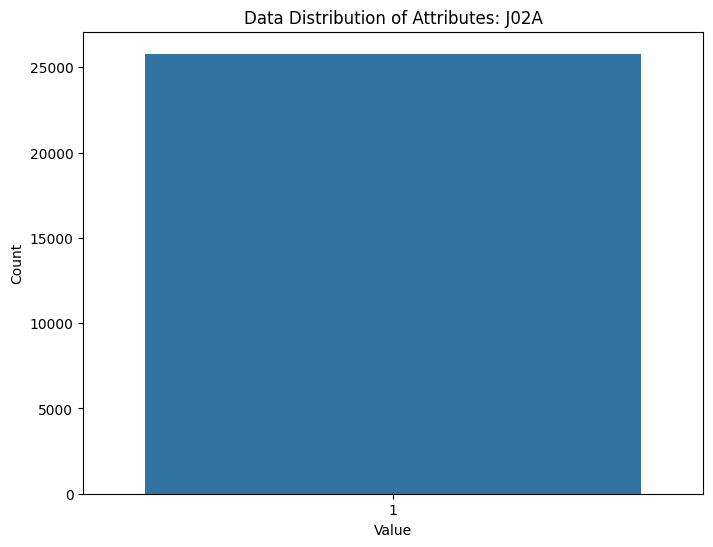

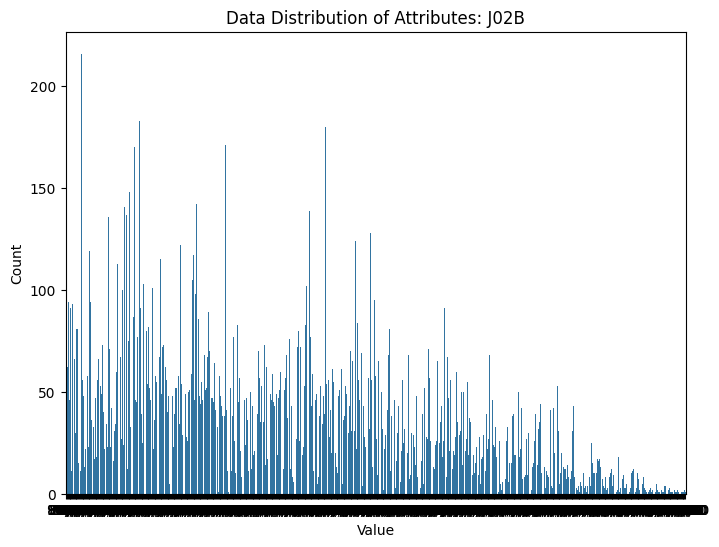

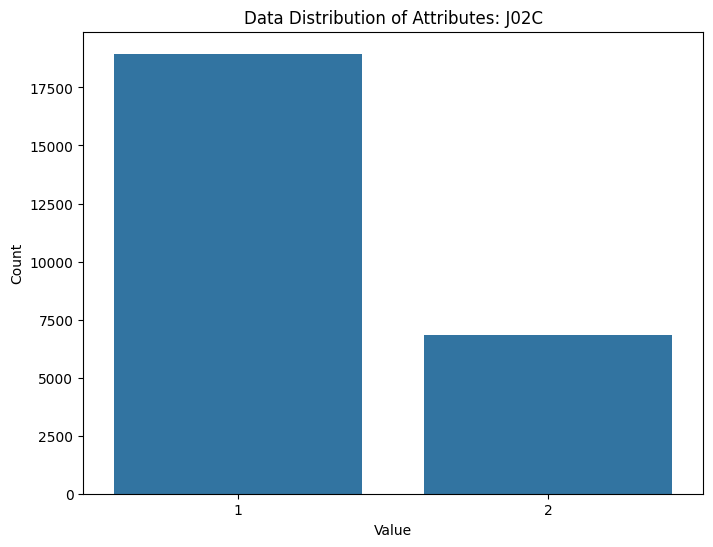

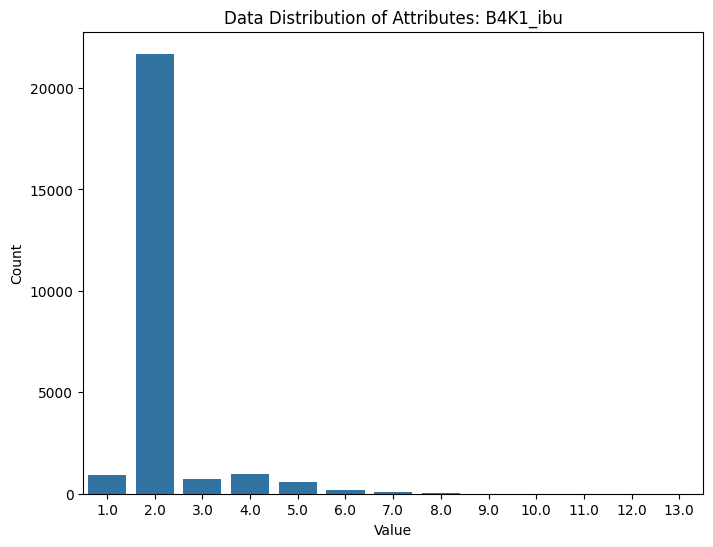

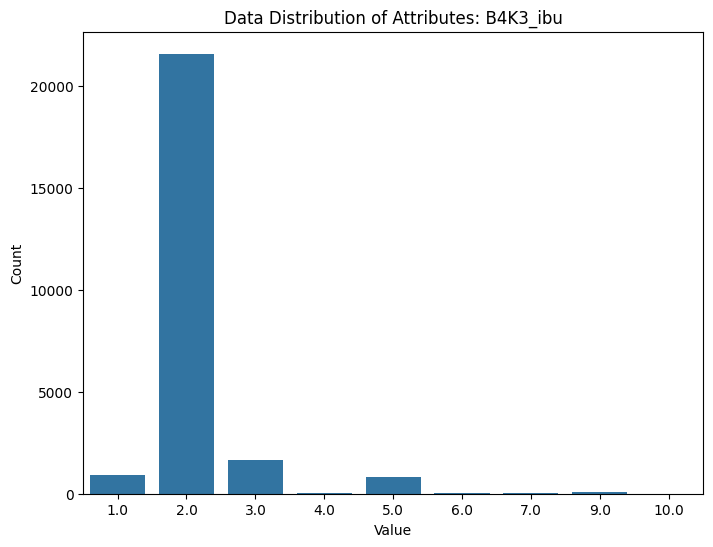

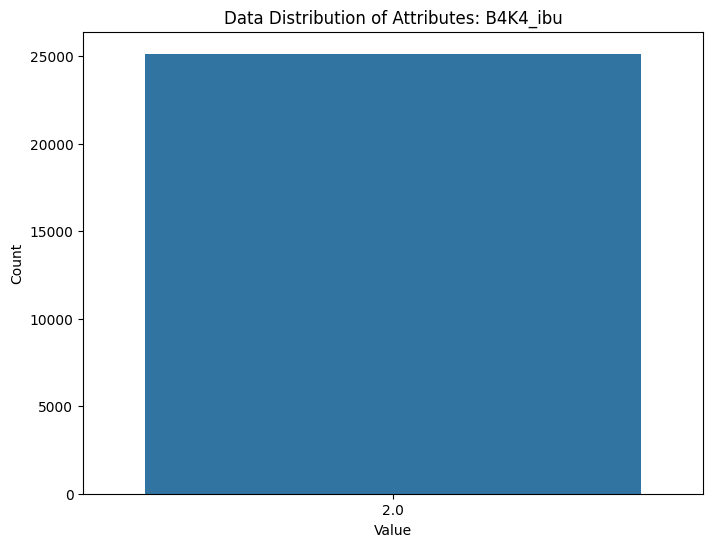

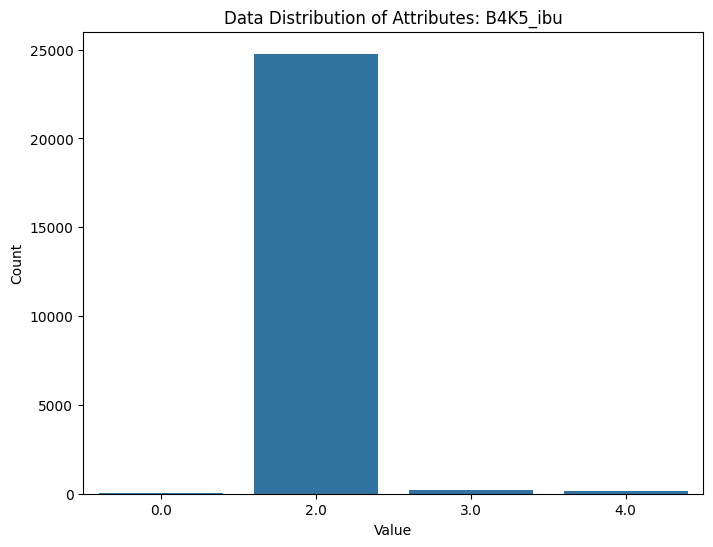

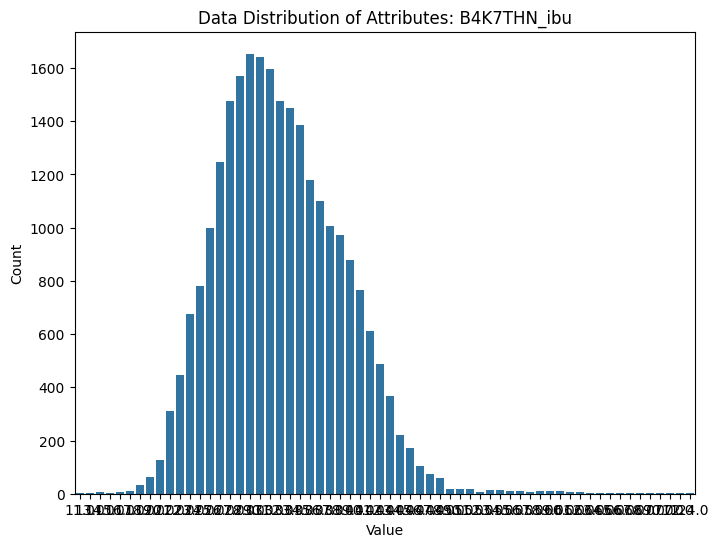

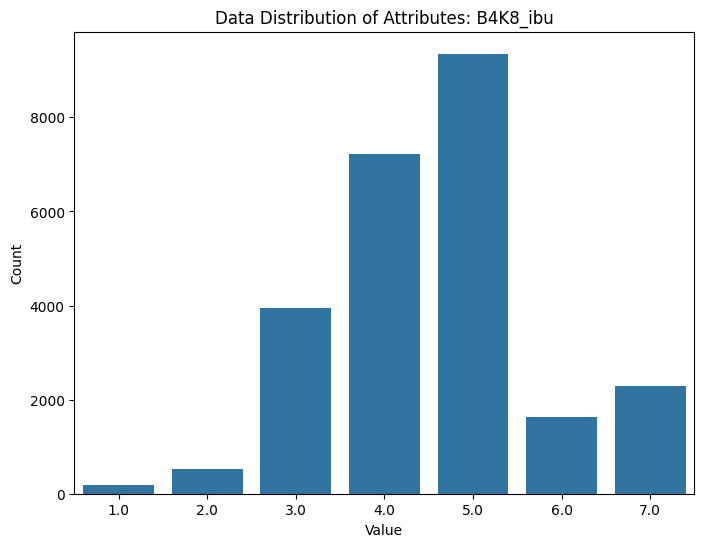

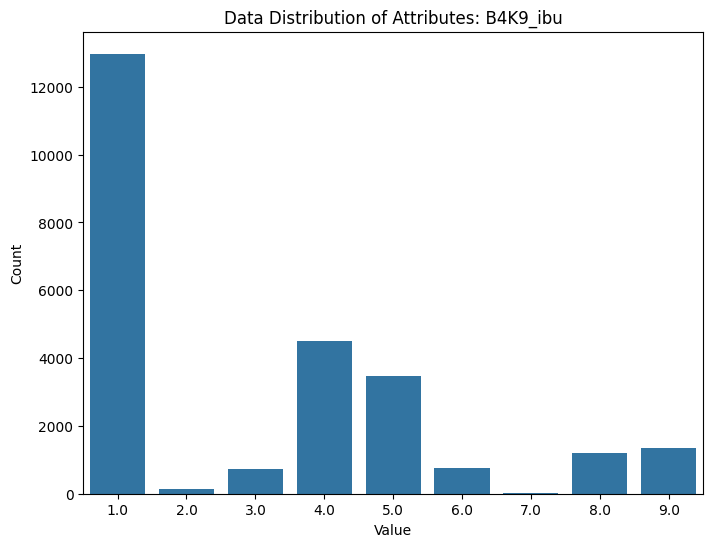

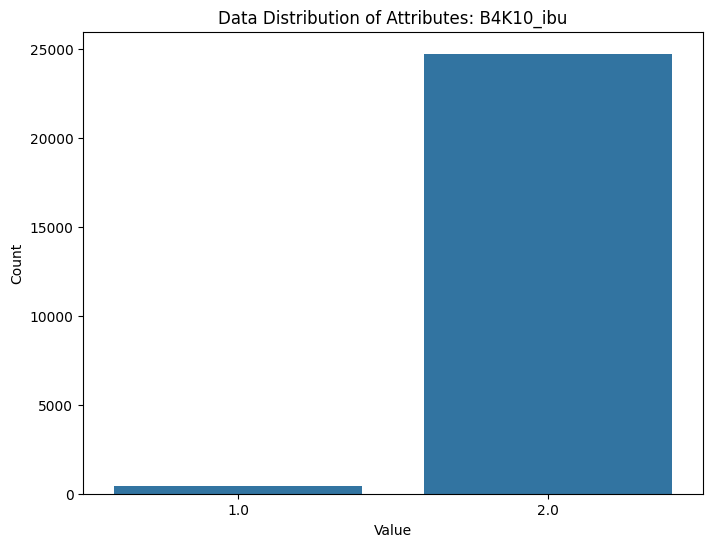

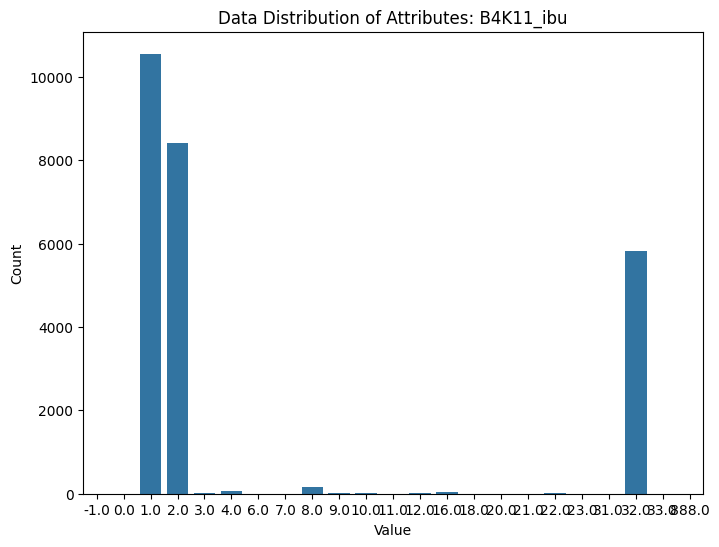

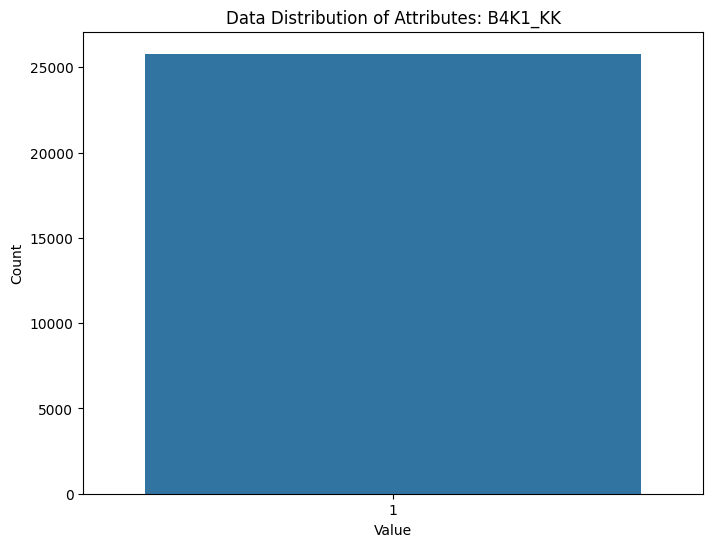

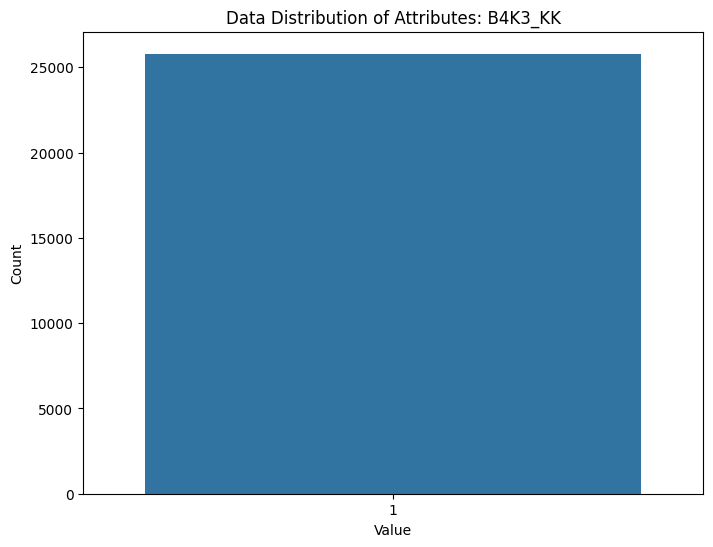

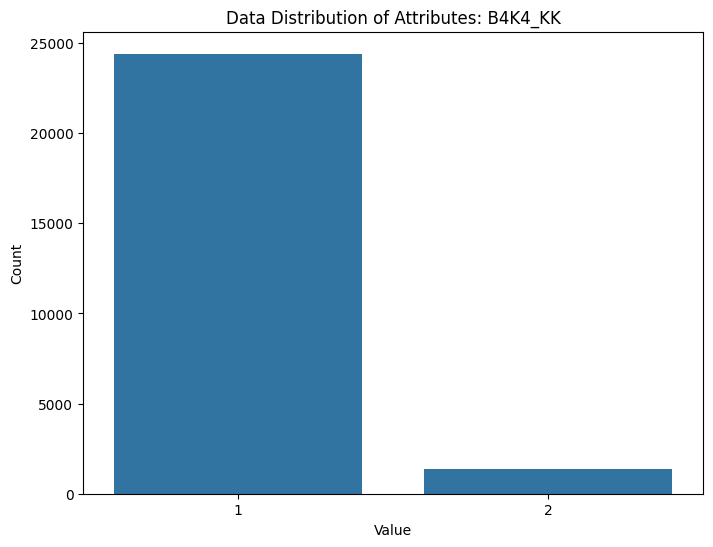

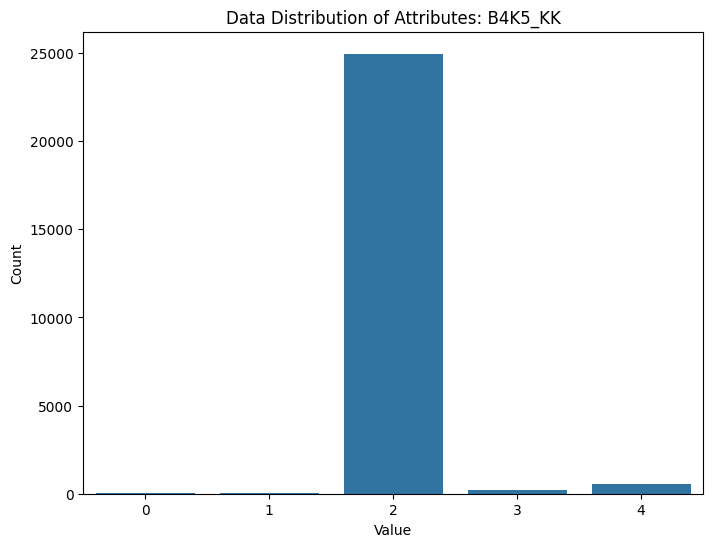

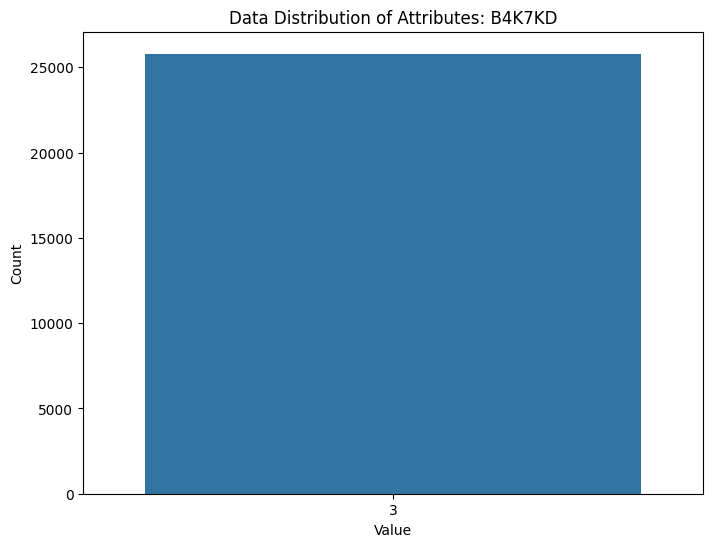

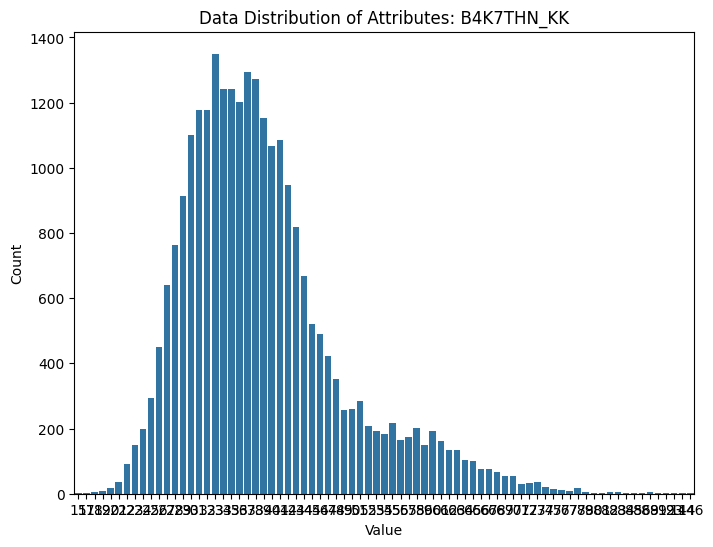

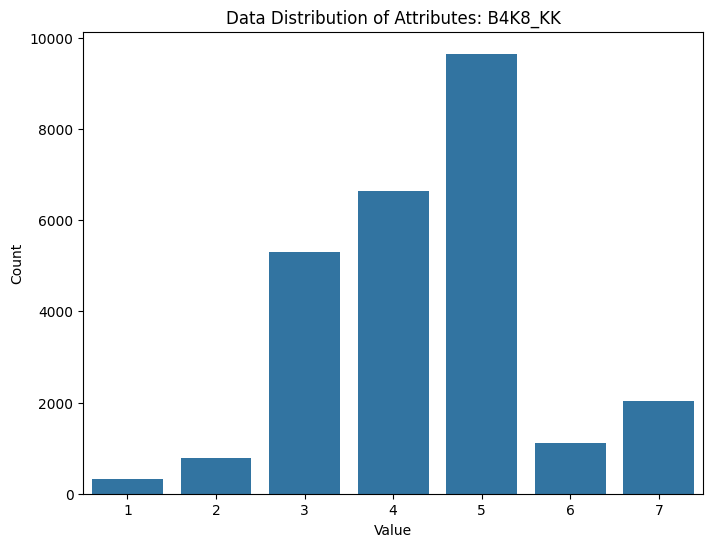

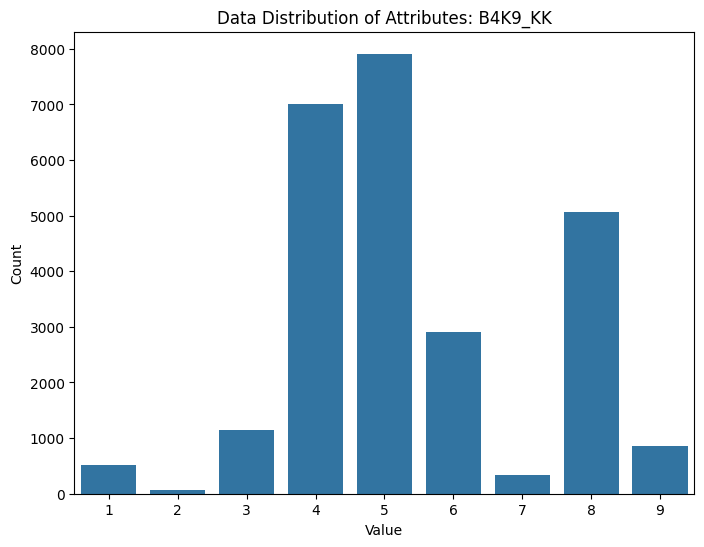

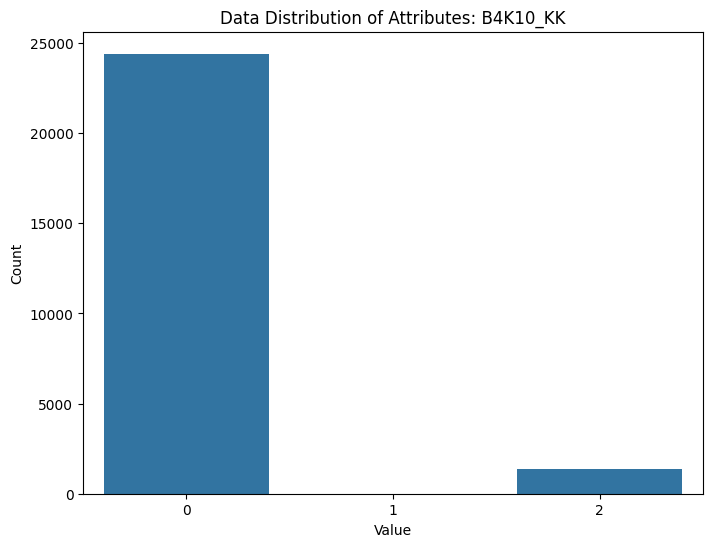

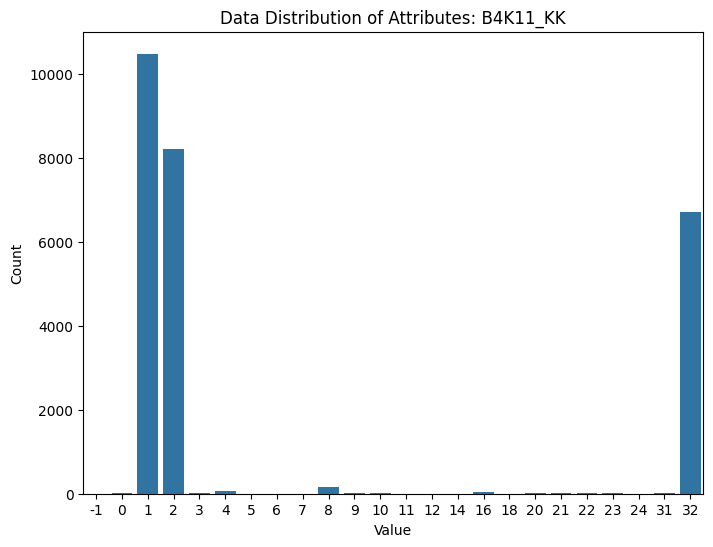

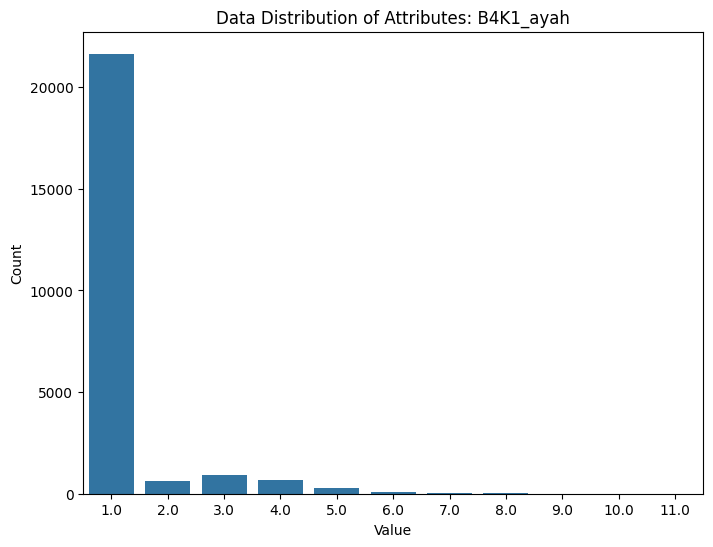

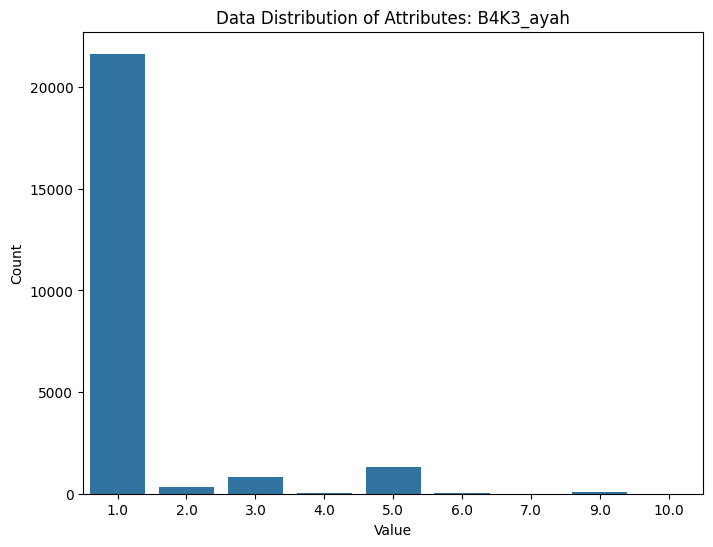

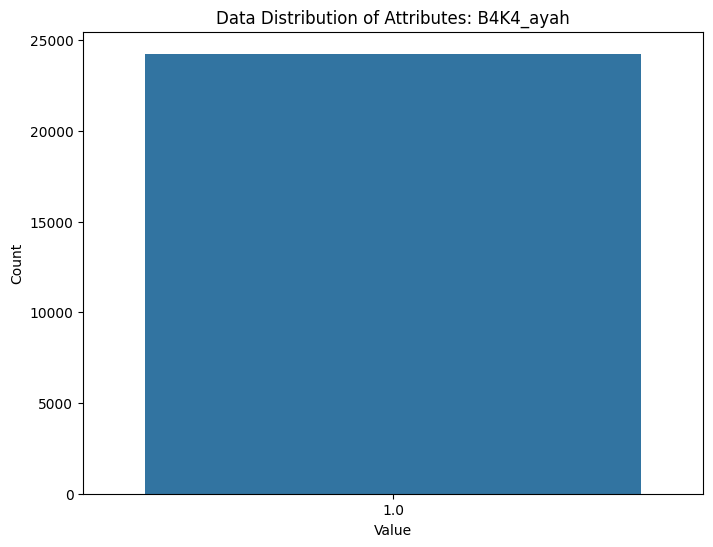

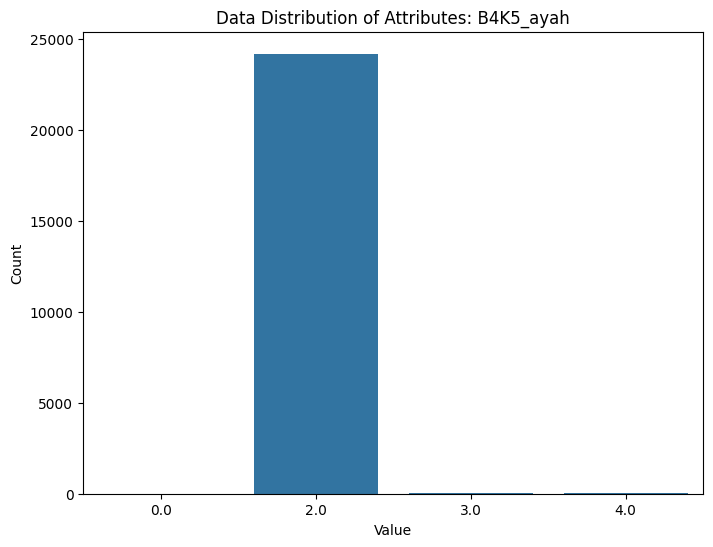

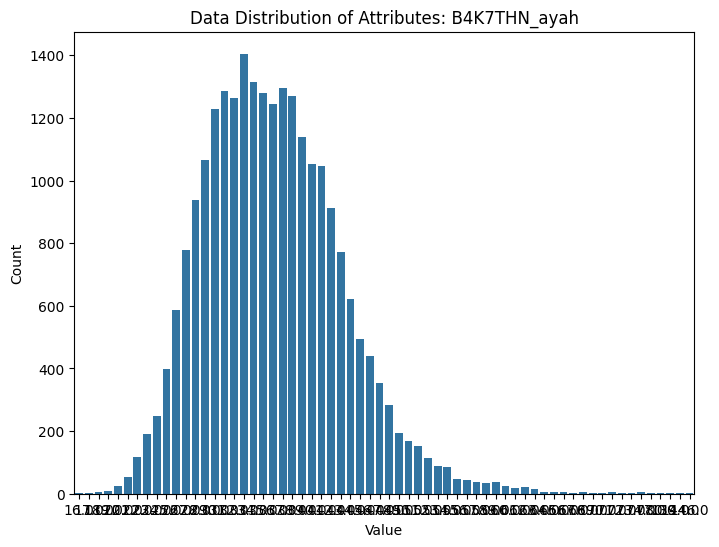

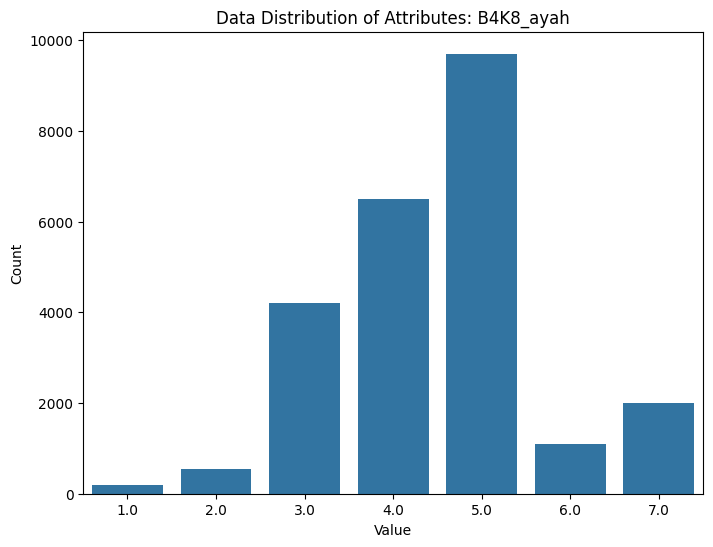

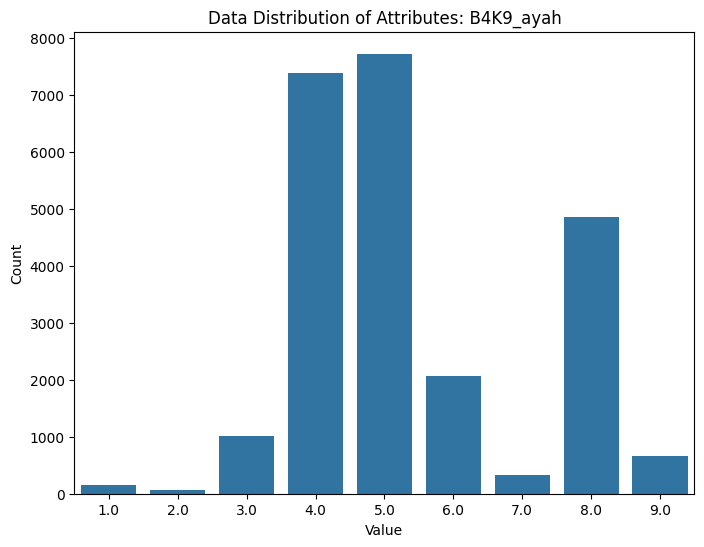

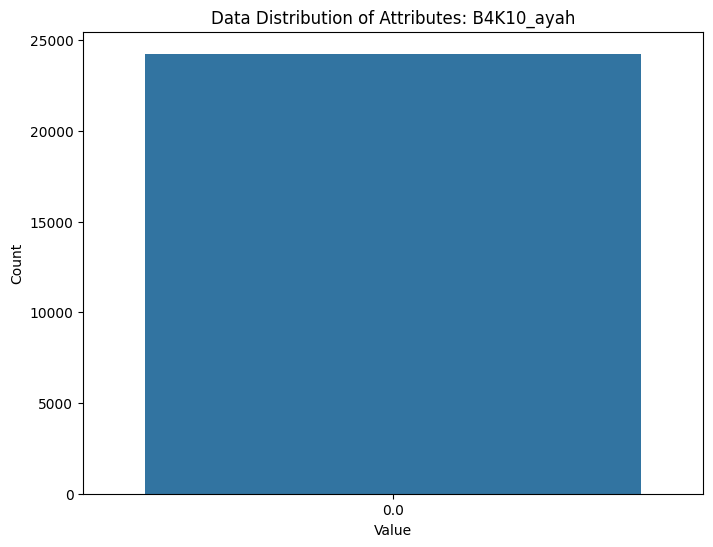

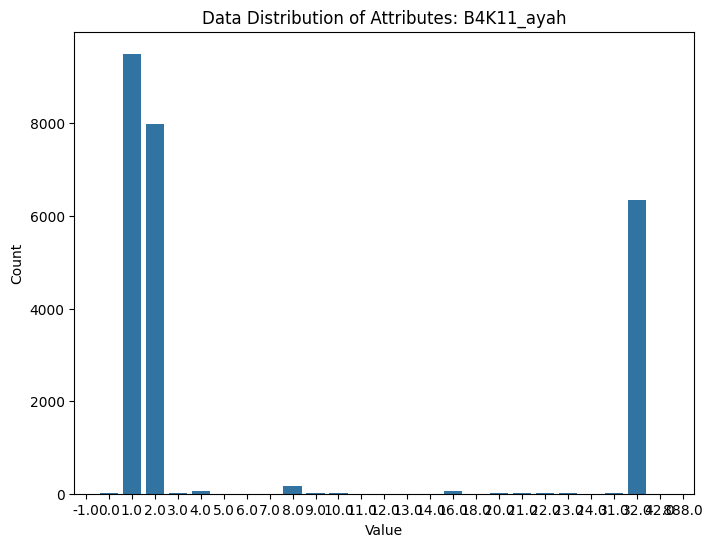

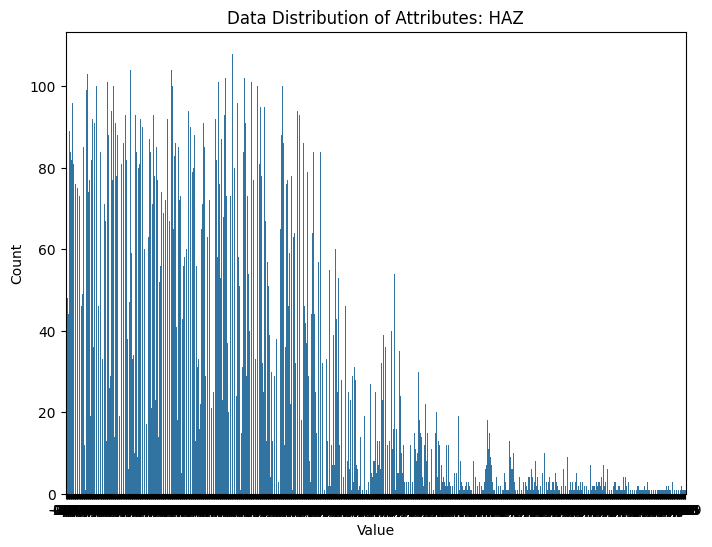

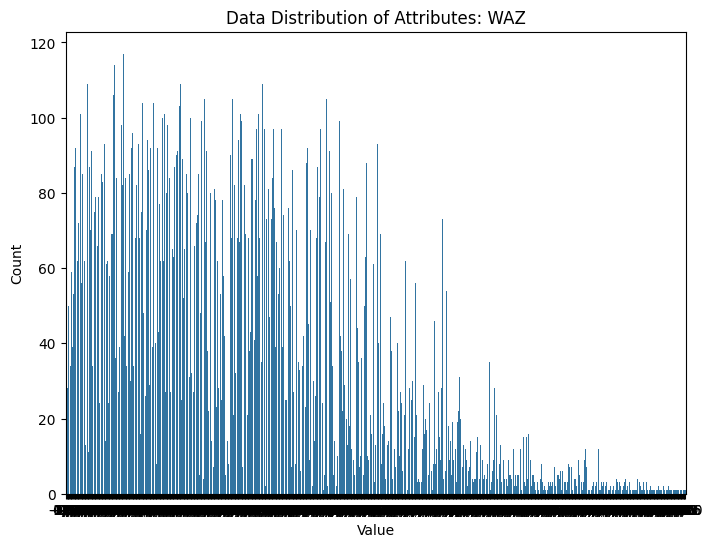

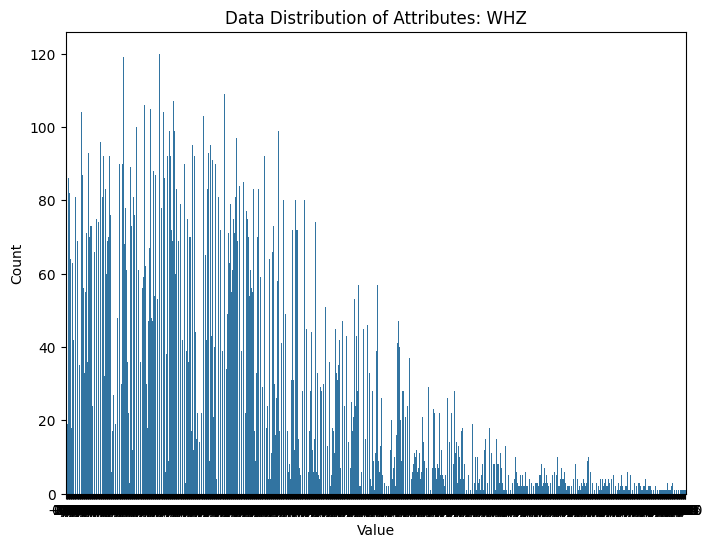

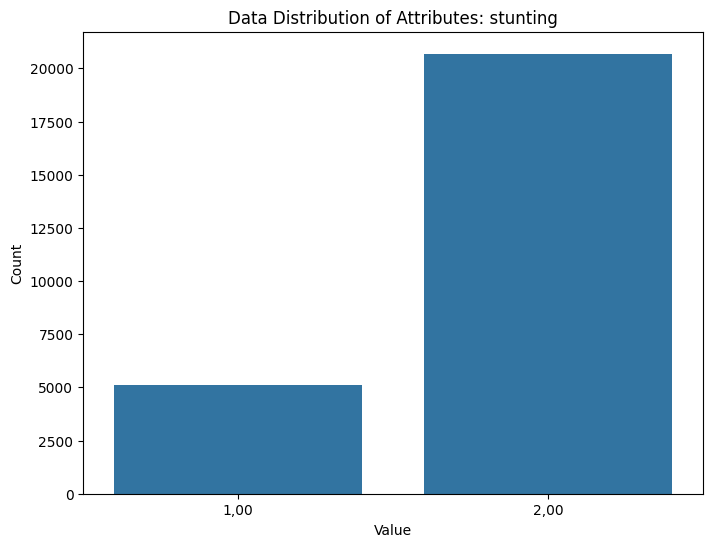

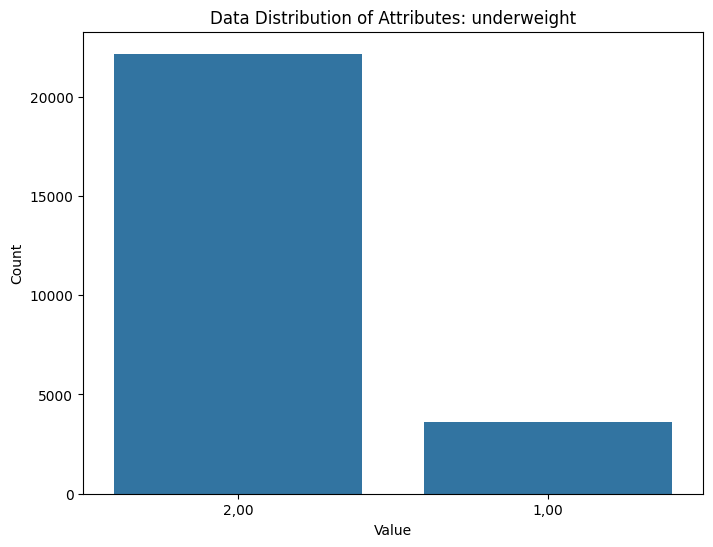

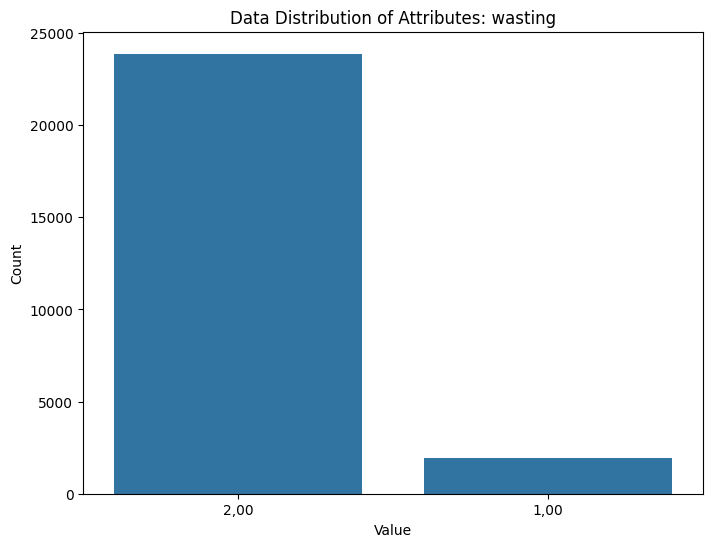

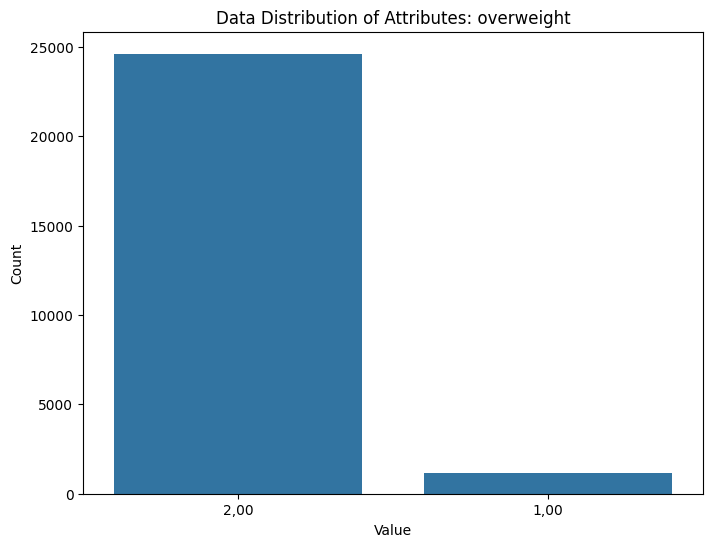

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display visualisations for each attribute
for atribut in df.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=atribut)
    plt.title('Data Distribution of Attributes: {}'.format(atribut))
    plt.xlabel('Value')
    plt.ylabel('Count')
    plt.show()

##**2.2 Daerah dan Stuntingnya**

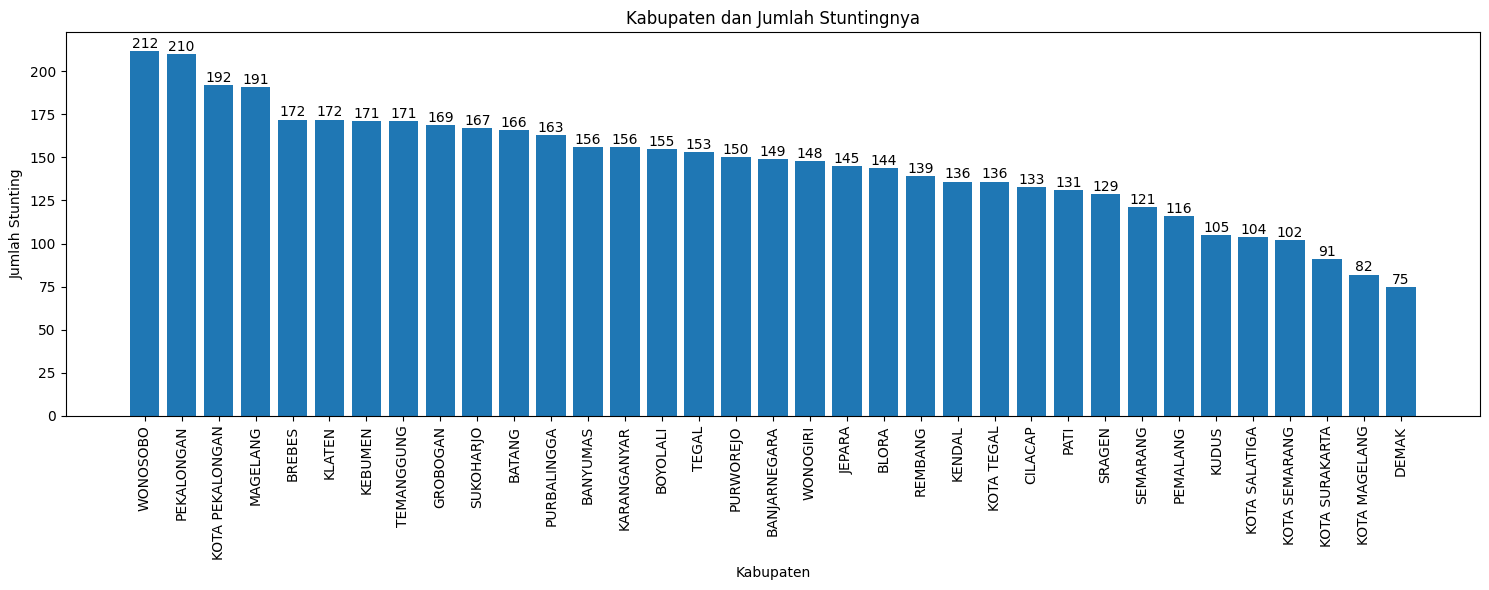

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter data untuk hanya memasukkan baris dengan status stunting (1)
df_stunting = df[df['stunting'] == '1,00']

# Group data berdasarkan kabupaten dan hitung jumlah stunting di tiap kabupaten
df_grouped = df_stunting.groupby('KBTEKS')['stunting'].count().reset_index()

# Urutkan data berdasarkan jumlah stunting dalam urutan menurun
df_grouped = df_grouped.sort_values(by='stunting', ascending=False)

# Buat bar chart untuk visualisasi
plt.figure(figsize=(15, 6))
bars=plt.bar(df_grouped['KBTEKS'], df_grouped['stunting'])
plt.title('Kabupaten dan Jumlah Stuntingnya')
plt.xlabel('Kabupaten')
plt.ylabel('Jumlah Stunting')
plt.xticks(rotation=90)
plt.tight_layout()
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + .05,
             round(yval,2), ha='center', va='bottom')
plt.show()

# **3. CLEANING DATA**

## **3.1 Cek Missing Value**

In [7]:
df.isnull().sum()

,0
IDRT,0
IDART,0
W_ruta,0
W_balita,0
PSU,0
...,...
WHZ,0
stunting,0
underweight,0
wasting,0


In [8]:
nan_count = df.isnull().sum().reset_index(name='nan')
data_types = df.dtypes.reset_index(name='dtype')

result = pd.merge(nan_count, data_types, on='index')
result


,index,nan,dtype
0,IDRT,0,int64
1,IDART,0,int64
2,W_ruta,0,object
3,W_balita,0,object
4,PSU,0,int64
...,...,...,...
62,WHZ,0,object
63,stunting,0,object
64,underweight,0,object
65,wasting,0,object


## **3.2 Cek Duplicate Value**

In [9]:
# Displaying duplicate data
duplicate_rows = df.duplicated()
print("All Duplicate Rows:")
df[df.duplicated(keep=False)]

All Duplicate Rows:


,IDRT,IDART,W_ruta,W_balita,PSU,STRATA,B1R1,provkab,B1R5,NART,...,B4K9_ayah,B4K10_ayah,B4K11_ayah,HAZ,WAZ,WHZ,stunting,underweight,wasting,overweight


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25800 entries, 0 to 25799
Data columns (total 67 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   IDRT          25800 non-null  int64  
 1   IDART         25800 non-null  int64  
 2   W_ruta        25800 non-null  object 
 3   W_balita      25800 non-null  object 
 4   PSU           25800 non-null  int64  
 5   STRATA        25800 non-null  int64  
 6   B1R1          25800 non-null  int64  
 7   provkab       25800 non-null  int64  
 8   B1R5          25800 non-null  int64  
 9   NART          25798 non-null  float64
 10  PTEKS         25800 non-null  object 
 11  KBTEKS        25800 non-null  object 
 12  B4K3          25800 non-null  int64  
 13  B4K4          25800 non-null  int64  
 14  b4k7hr        25800 non-null  int64  
 15  b4k7bln       25800 non-null  int64  
 16  I01           25792 non-null  float64
 17  I04           25349 non-null  float64
 18  BB8R3         19423 non-nu

## **3.3Hapus Kolom yang tidak perlu**

In [11]:
df.drop(['IDRT','IDART','W_ruta','W_balita','PSU','STRATA','B1R1','provkab','B1R5','NART','PTEKS','KBTEKS','B4K3','b4k7hr','b4k7bln','I01','BB8R3','I05B','I08','I09','BB8R9','J01A','J02A','B4K1_ibu','B4K3_ibu','B4K4_ibu','B4K7THN_ibu','B4K1_KK','B4K3_KK','B4K4_KK','B4K5_KK','B4K7KD','B4K7THN_KK','B4K10_KK','B4K11_KK','B4K1_ayah','B4K3_ayah','B4K4_ayah','B4K5_ayah','B4K7THN_ayah','B4K8_ayah','B4K9_ayah','B4K10_ayah','B4K11_ayah','HAZ','WAZ','WHZ'], axis=1, inplace=True)

In [12]:
dataClean = df
print(dataClean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25800 entries, 0 to 25799
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   B4K4         25800 non-null  int64  
 1   I04          25349 non-null  float64
 2   I05A         25568 non-null  object 
 3   I07          25800 non-null  object 
 4   I10          23436 non-null  object 
 5   J01B         25794 non-null  float64
 6   J01C         25800 non-null  object 
 7   J02B         25800 non-null  object 
 8   J02C         25800 non-null  int64  
 9   B4K5_ibu     25149 non-null  float64
 10  B4K8_ibu     25149 non-null  float64
 11  B4K9_ibu     25149 non-null  float64
 12  B4K10_ibu    25149 non-null  float64
 13  B4K11_ibu    25149 non-null  float64
 14  B4K8_KK      25800 non-null  int64  
 15  B4K9_KK      25800 non-null  int64  
 16  stunting     25800 non-null  object 
 17  underweight  25800 non-null  object 
 18  wasting      25800 non-null  object 
 19  over

## **3.4 Hapus Missing Value**

In [13]:
dataClean.dropna(inplace=True)

In [14]:
dataClean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22399 entries, 1 to 25799
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   B4K4         22399 non-null  int64  
 1   I04          22399 non-null  float64
 2   I05A         22399 non-null  object 
 3   I07          22399 non-null  object 
 4   I10          22399 non-null  object 
 5   J01B         22399 non-null  float64
 6   J01C         22399 non-null  object 
 7   J02B         22399 non-null  object 
 8   J02C         22399 non-null  int64  
 9   B4K5_ibu     22399 non-null  float64
 10  B4K8_ibu     22399 non-null  float64
 11  B4K9_ibu     22399 non-null  float64
 12  B4K10_ibu    22399 non-null  float64
 13  B4K11_ibu    22399 non-null  float64
 14  B4K8_KK      22399 non-null  int64  
 15  B4K9_KK      22399 non-null  int64  
 16  stunting     22399 non-null  object 
 17  underweight  22399 non-null  object 
 18  wasting      22399 non-null  object 
 19  overweigh

#**4. ENCODING**

## **4.1 Mengubah Tipe Data Object ke Numeric**

In [15]:
from sklearn.preprocessing import LabelEncoder

# Buat objek LabelEncoder
le = LabelEncoder()

# Ubah tipe data kolom 'I05A' menjadi angka
dataClean['I05A'] = le.fit_transform(df['I05A'])

# Ubah tipe data kolom 'I07' menjadi angka
dataClean['I07'] = le.fit_transform(df['I07'])

# Ubah tipe data kolom 'I10' menjadi angka
dataClean['I10'] = le.fit_transform(df['I10'])

# Ubah tipe data kolom 'J01C' menjadi angka
dataClean['J01C'] = le.fit_transform(df['J01C'])

# Ubah tipe data kolom 'J02B' menjadi angka
dataClean['J02B'] = le.fit_transform(df['J02B'])

# Ubah tipe data kolom 'J02B' menjadi angka
dataClean['stunting'] = le.fit_transform(df['stunting'])

# Ubah tipe data kolom 'J02B' menjadi angka
dataClean['underweight'] = le.fit_transform(df['underweight'])

# Ubah tipe data kolom 'J02B' menjadi angka
dataClean['wasting'] = le.fit_transform(df['wasting'])

# Ubah tipe data kolom 'J02B' menjadi angka
dataClean['overweight'] = le.fit_transform(df['overweight'])

In [16]:
dataClean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22399 entries, 1 to 25799
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   B4K4         22399 non-null  int64  
 1   I04          22399 non-null  float64
 2   I05A         22399 non-null  int64  
 3   I07          22399 non-null  int64  
 4   I10          22399 non-null  int64  
 5   J01B         22399 non-null  float64
 6   J01C         22399 non-null  int64  
 7   J02B         22399 non-null  int64  
 8   J02C         22399 non-null  int64  
 9   B4K5_ibu     22399 non-null  float64
 10  B4K8_ibu     22399 non-null  float64
 11  B4K9_ibu     22399 non-null  float64
 12  B4K10_ibu    22399 non-null  float64
 13  B4K11_ibu    22399 non-null  float64
 14  B4K8_KK      22399 non-null  int64  
 15  B4K9_KK      22399 non-null  int64  
 16  stunting     22399 non-null  int64  
 17  underweight  22399 non-null  int64  
 18  wasting      22399 non-null  int64  
 19  overweigh

## **4.2 Korelasi Antar Fitur**

In [17]:
dataClean.corr()

,B4K4,I04,I05A,I07,I10,J01B,J01C,J02B,J02C,B4K5_ibu,B4K8_ibu,B4K9_ibu,B4K10_ibu,B4K11_ibu,B4K8_KK,B4K9_KK,stunting,underweight,wasting,overweight
B4K4,1.000000,0.014189,-0.098973,-0.088644,-0.031586,-0.012737,0.042110,0.021444,0.001789,-0.000054,-0.002024,-0.011530,-0.012906,-0.000612,-0.003506,-0.003242,0.020989,0.010232,0.023898,0.033176
I04,0.014189,1.000000,0.264192,0.144996,-0.009185,-0.003066,-0.022032,0.012264,-0.021155,-0.000394,0.000762,-0.003603,-0.000976,0.005083,-0.002172,0.011054,0.034763,0.041565,0.027833,-0.008322
I05A,-0.098973,0.264192,1.000000,0.451274,0.116496,-0.004576,-0.051249,-0.021378,-0.029998,-0.021090,0.018697,-0.009771,0.005113,0.008729,0.025106,-0.015903,0.157984,0.175321,0.090770,-0.038444
I07,-0.088644,0.144996,0.451274,1.000000,0.270746,-0.006839,-0.058211,-0.005164,-0.050021,-0.001328,-0.001296,0.009310,-0.004588,0.017228,0.005700,-0.015922,0.112735,0.097053,0.028066,-0.013119
I10,-0.031586,-0.009185,0.116496,0.270746,1.000000,0.018874,-0.063538,-0.001848,-0.077848,0.007064,0.036601,-0.015786,0.003602,-0.005494,0.037055,-0.032495,0.022798,0.034762,0.030370,-0.017674
J01B,-0.012737,-0.003066,-0.004576,-0.006839,0.018874,1.000000,0.047385,0.008997,0.038049,0.000299,0.002222,-0.012247,0.007475,-0.007722,0.005049,0.023372,-0.025020,-0.048555,-0.023117,0.020815
J01C,0.042110,-0.022032,-0.051249,-0.058211,-0.063538,0.047385,1.000000,-0.261856,0.549850,-0.021312,0.012613,-0.033818,0.030149,-0.027422,-0.008648,0.002733,-0.014952,-0.051309,-0.065432,-0.035409
J02B,0.021444,0.012264,-0.021378,-0.005164,-0.001848,0.008997,-0.261856,1.000000,-0.157826,-0.004032,-0.037624,-0.005685,0.012851,0.018640,-0.024036,0.015770,-0.164936,-0.127910,-0.001668,0.088551
J02C,0.001789,-0.021155,-0.029998,-0.050021,-0.077848,0.038049,0.549850,-0.157826,1.000000,-0.023177,-0.008502,-0.031922,0.047107,-0.018172,-0.036910,0.007769,0.041160,0.060645,0.004266,-0.004654
B4K5_ibu,-0.000054,-0.000394,-0.021090,-0.001328,0.007064,0.000299,-0.021312,-0.004032,-0.023177,1.000000,0.000904,0.066261,0.009702,0.000209,-0.011447,-0.010174,0.000567,0.003429,0.016191,-0.013716


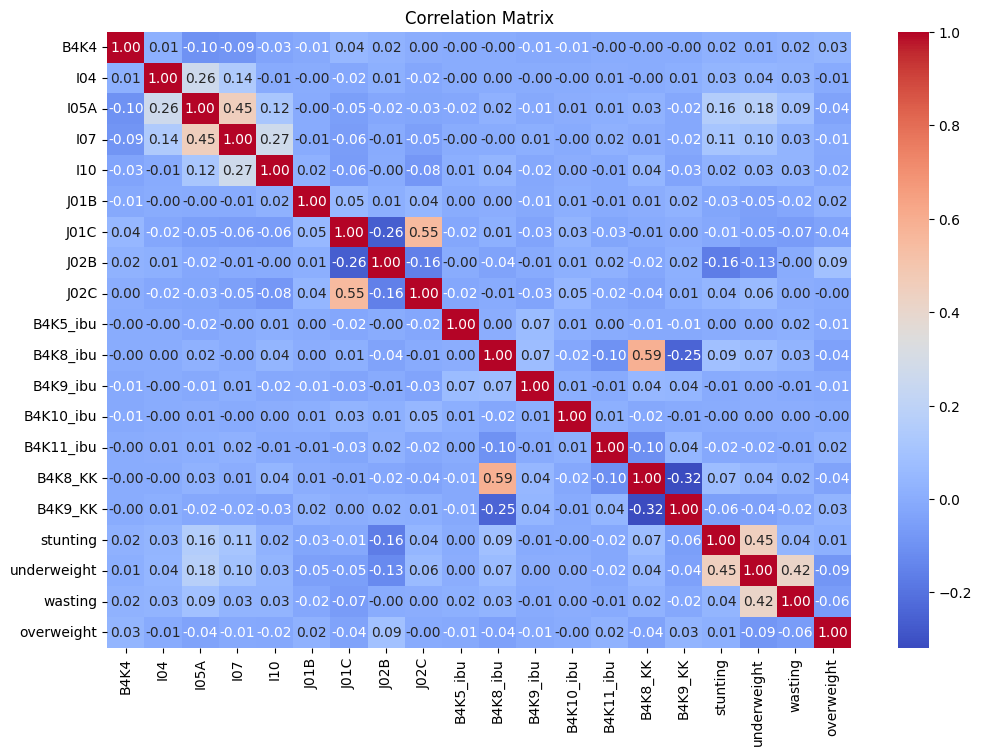

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
# Correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = dataClean.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

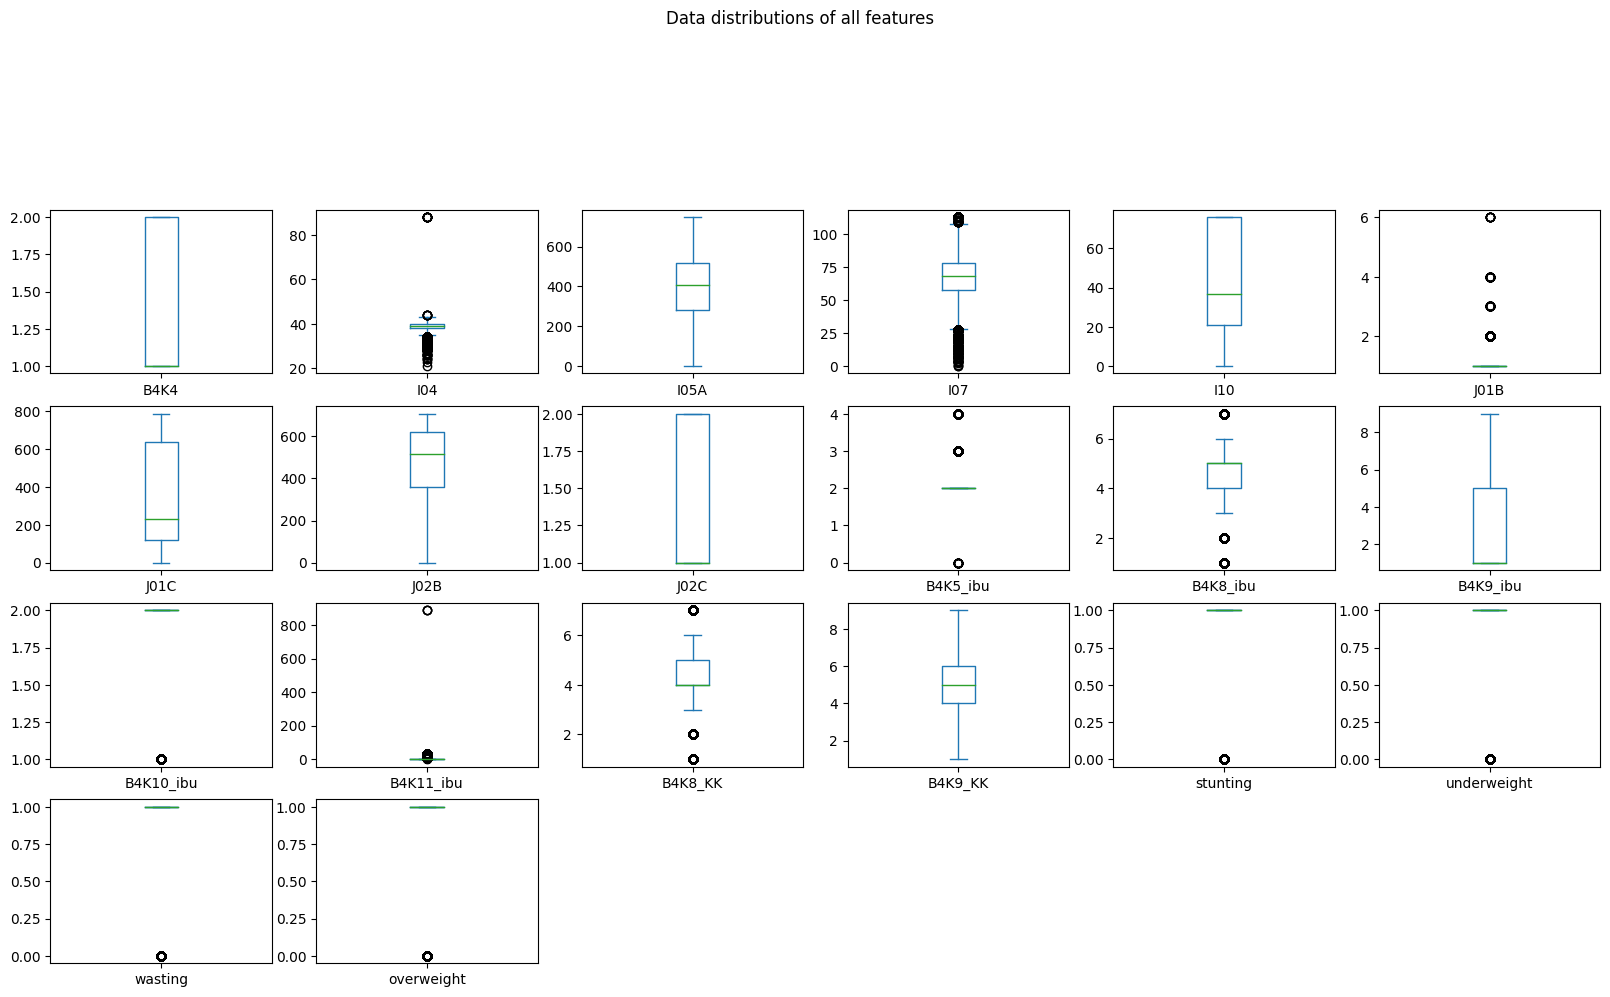

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Adjust the layout to accommodate the number of columns in your dataset
dataClean.plot(kind='box', subplots=True, layout=(8,6), sharex=False, figsize=(20, 20),
        title='Data distributions of all features')
plt.show()

# **5. DATA CONSTRUCTION**

In [20]:
dataClean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22399 entries, 1 to 25799
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   B4K4         22399 non-null  int64  
 1   I04          22399 non-null  float64
 2   I05A         22399 non-null  int64  
 3   I07          22399 non-null  int64  
 4   I10          22399 non-null  int64  
 5   J01B         22399 non-null  float64
 6   J01C         22399 non-null  int64  
 7   J02B         22399 non-null  int64  
 8   J02C         22399 non-null  int64  
 9   B4K5_ibu     22399 non-null  float64
 10  B4K8_ibu     22399 non-null  float64
 11  B4K9_ibu     22399 non-null  float64
 12  B4K10_ibu    22399 non-null  float64
 13  B4K11_ibu    22399 non-null  float64
 14  B4K8_KK      22399 non-null  int64  
 15  B4K9_KK      22399 non-null  int64  
 16  stunting     22399 non-null  int64  
 17  underweight  22399 non-null  int64  
 18  wasting      22399 non-null  int64  
 19  overweigh

## **5.1 Data Oversampling with SMOTE**

In [21]:
X = dataClean.drop('stunting', axis=1)  # Features
y = dataClean['stunting']

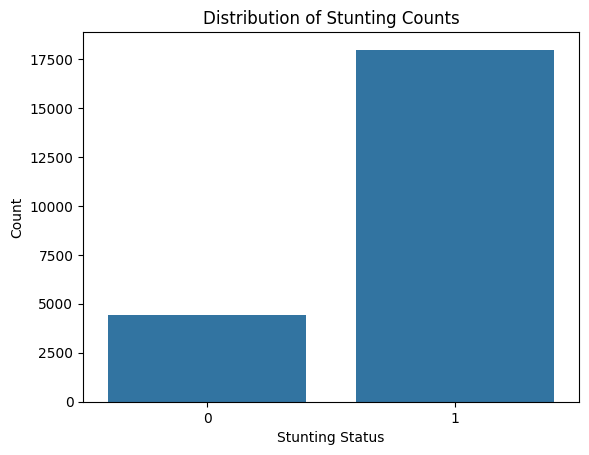

Count of each unique value in 'counts':
stunting
1    17970
0     4429
Name: count, dtype: int64


In [22]:
# Distribution Target Feature

sns.countplot(x='stunting', data=dataClean)
plt.title('Distribution of Stunting Counts')
plt.xlabel('Stunting Status')
plt.ylabel('Count')
plt.show()

counts = dataClean['stunting'].value_counts()

print("Count of each unique value in 'counts':")
print(counts)

In [23]:
from imblearn.over_sampling import SMOTE

# Oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

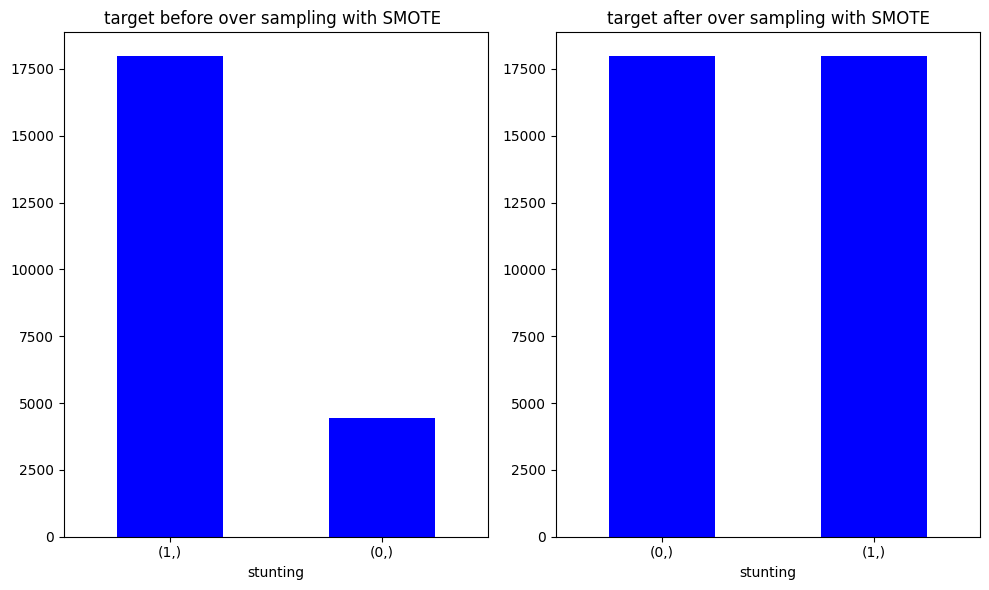

In [24]:
plt.figure(figsize=(12, 4))

new_df1 = pd.DataFrame(data=y)

plt.subplot(1, 2, 1)
new_df1.value_counts().plot(kind='bar',figsize=(10,6),color=['blue'])
plt.title("target before over sampling with SMOTE ")
plt.xticks(rotation=0);


plt.subplot(1, 2, 2)
new_df2 = pd.DataFrame(data=y_resampled)


new_df2.value_counts().plot(kind='bar',figsize=(10,6),color=['blue'])
plt.title("target after over sampling with SMOTE")
plt.xticks(rotation=0);

plt.tight_layout()
plt.show()

##**5.2 Normalization with StandardScaler**

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_resampled_normal = scaler.fit_transform(X_resampled)

#**6. Data Splitting**

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
# Membagi fitur dan target menjadi data train dan test (untuk yang oversample saja)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42,stratify=y_resampled)

In [28]:
# Split features and targets into train and test data (for oversample + Normalization)
X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_split(X_resampled_normal, y_resampled, test_size=0.2, random_state=42,stratify=y_resampled)

#**7. MODELLING**

##**7.1 Modelling for SMOTE + Tuning**

In [32]:
pip install scikeras

In [33]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler


In [34]:
# Define the model
def create_model(optimizer='adam', dropout_rate=0.0):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(dropout_rate))  # Dropout for regularization
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropout_rate))  # Dropout for regularization
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [39]:
# Wrap the model with KerasClassifier for GridSearch
model = KerasClassifier(model=create_model, verbose=0)

# Define hyperparameters to tune
param_grid = {
    'batch_size': [32, 64],
    'epochs': [100, 200],
    'optimizer': ['adam', 'rmsprop']
}

# Grid Search for hyperparameter tuning
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_result = grid_search.fit(X_train, y_train)

# Output best parameters
print("Best Hyperparameters: ", grid_search_result.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best Hyperparameters:  {'batch_size': 32, 'epochs': 200, 'optimizer': 'adam'}


In [40]:
# Define learning rate scheduler function
def lr_scheduler(epoch, lr):
    if epoch > 50:
        return lr * 0.9  # Reduce learning rate by 10% after 50 epochs
    return lr

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Learning Rate Scheduler
lr_scheduler_callback = LearningRateScheduler(lr_scheduler)

# Mendapatkan model terbaik setelah GridSearchCV
best_model = grid_search.best_estimator_

# Pelatihan ulang dengan best_model
history = best_model.fit(X_train, y_train,
                         epochs=grid_search_result.best_params_['epochs'],
                         batch_size=grid_search_result.best_params_['batch_size'],
                         validation_data=(X_test, y_test),
                         callbacks=[early_stopping, lr_scheduler_callback],
                         verbose=2)



Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


899/899 - 3s - 3ms/step - accuracy: 0.6119 - loss: 0.9129 - val_accuracy: 0.6258 - val_loss: 0.9920
Epoch 2/200
899/899 - 2s - 3ms/step - accuracy: 0.6453 - loss: 0.6461 - val_accuracy: 0.6928 - val_loss: 0.5650
Epoch 3/200
899/899 - 3s - 3ms/step - accuracy: 0.6756 - loss: 0.5873 - val_accuracy: 0.7158 - val_loss: 0.5462
Epoch 4/200
899/899 - 3s - 4ms/step - accuracy: 0.7029 - loss: 0.5477 - val_accuracy: 0.7667 - val_loss: 0.4841
Epoch 5/200
899/899 - 2s - 2ms/step - accuracy: 0.7277 - loss: 0.5200 - val_accuracy: 0.7529 - val_loss: 0.4767
Epoch 6/200
899/899 - 2s - 3ms/step - accuracy: 0.7384 - loss: 0.5031 - val_accuracy: 0.7660 - val_loss: 0.4754
Epoch 7/200
899/899 - 1s - 2ms/step - accuracy: 0.7504 - loss: 0.4870 - val_accuracy: 0.7625 - val_loss: 0.4794
Epoch 8/200
899/899 - 3s - 3ms/step - accuracy: 0.7575 - loss: 0.4750 - val_accuracy: 0.7766 - val_loss: 0.4441
Epoch 9/200
899/899 - 3s - 3ms/step - accuracy: 0.7675 - loss: 0.4590 - val_accuracy: 0.7876 - val_loss: 0.4345
Epoc

In [41]:
# Predict on test data
y_pred = best_model.predict(X_test)
y_pred_class = (y_pred > 0.5).astype('int32')

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred_class)
print(f"Optimized Model Accuracy: {accuracy}")
print(classification_report(y_test, y_pred_class))


Optimized Model Accuracy: 0.820534223706177
              precision    recall  f1-score   support

           0       0.85      0.78      0.81      3594
           1       0.80      0.86      0.83      3594

    accuracy                           0.82      7188
   macro avg       0.82      0.82      0.82      7188
weighted avg       0.82      0.82      0.82      7188



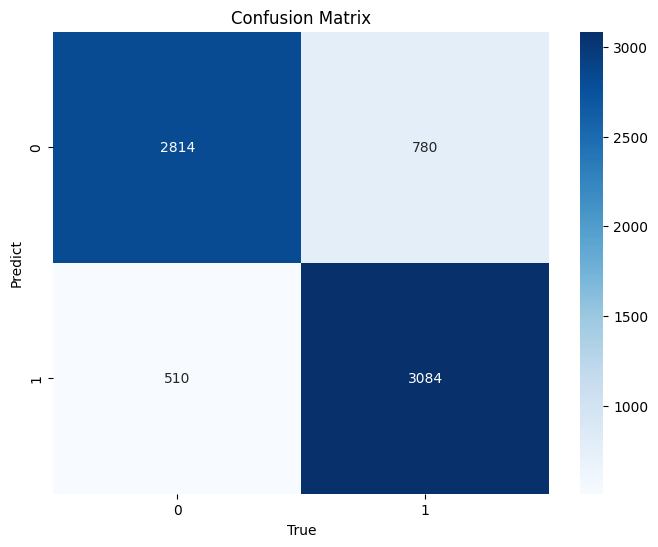

In [42]:
# Import library yang diperlukan
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred_class)

# Membuat plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

##**7.2 Modelling SMOTE + Normalization + Tuning**

In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler


In [30]:
# Define the model
def create_model(optimizer='adam', dropout_rate=0.0):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(X_train_normal.shape[1],)))
    model.add(Dropout(dropout_rate))  # Dropout for regularization
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropout_rate))  # Dropout for regularization
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
# Wrap the model with KerasClassifier for GridSearch
model = KerasClassifier(model=create_model, verbose=0)

# Define hyperparameters to tune
param_grid = {
    'batch_size': [32, 64],
    'epochs': [100, 200],
    'optimizer': ['adam', 'rmsprop']
}

# Grid Search for hyperparameter tuning
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_result = grid_search.fit(X_train_normal, y_train_normal)

# Output best parameters
print("Best Hyperparameters: ", grid_search_result.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


In [41]:
# Define learning rate scheduler function
def lr_scheduler(epoch, lr):
    if epoch > 50:
        return lr * 0.9  # Reduce learning rate by 10% after 50 epochs
    return lr

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Learning Rate Scheduler
lr_scheduler_callback = LearningRateScheduler(lr_scheduler)

# Mendapatkan model terbaik setelah GridSearchCV
best_model = grid_search.best_estimator_

# Pelatihan ulang dengan best_model
history = best_model.fit(X_train_normal, y_train_normal,
                         epochs=grid_search_result.best_params_['epochs'],
                         batch_size=grid_search_result.best_params_['batch_size'],
                         validation_data=(X_test_normal, y_test_normal),
                         callbacks=[early_stopping, lr_scheduler_callback],
                         verbose=2)



Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


899/899 - 3s - 3ms/step - accuracy: 0.7727 - loss: 0.4653 - val_accuracy: 0.7905 - val_loss: 0.4298
Epoch 2/100
899/899 - 3s - 4ms/step - accuracy: 0.7960 - loss: 0.4258 - val_accuracy: 0.7916 - val_loss: 0.4313
Epoch 3/100
899/899 - 2s - 2ms/step - accuracy: 0.8020 - loss: 0.4147 - val_accuracy: 0.7998 - val_loss: 0.4165
Epoch 4/100
899/899 - 3s - 3ms/step - accuracy: 0.8067 - loss: 0.4083 - val_accuracy: 0.8129 - val_loss: 0.3998
Epoch 5/100
899/899 - 2s - 2ms/step - accuracy: 0.8119 - loss: 0.4015 - val_accuracy: 0.8094 - val_loss: 0.4046
Epoch 6/100
899/899 - 2s - 2ms/step - accuracy: 0.8136 - loss: 0.3980 - val_accuracy: 0.8169 - val_loss: 0.3951
Epoch 7/100
899/899 - 2s - 2ms/step - accuracy: 0.8187 - loss: 0.3930 - val_accuracy: 0.8158 - val_loss: 0.3935
Epoch 8/100
899/899 - 2s - 2ms/step - accuracy: 0.8221 - loss: 0.3878 - val_accuracy: 0.8207 - val_loss: 0.3884
Epoch 9/100
899/899 - 3s - 3ms/step - accuracy: 0.8229 - loss: 0.3843 - val_accuracy: 0.8211 - val_loss: 0.3855
Epoc

In [42]:
# Predict on test data
y_pred_normal = best_model.predict(X_test_normal)
y_pred_class_normal = (y_pred_normal > 0.5).astype('int32')

# Evaluate accuracy
accuracy = accuracy_score(y_test_normal, y_pred_class_normal)
print(f"Optimized Model Accuracy: {accuracy}")
print(classification_report(y_test_normal, y_pred_class_normal))


Optimized Model Accuracy: 0.8464106844741235
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      3594
           1       0.84      0.85      0.85      3594

    accuracy                           0.85      7188
   macro avg       0.85      0.85      0.85      7188
weighted avg       0.85      0.85      0.85      7188



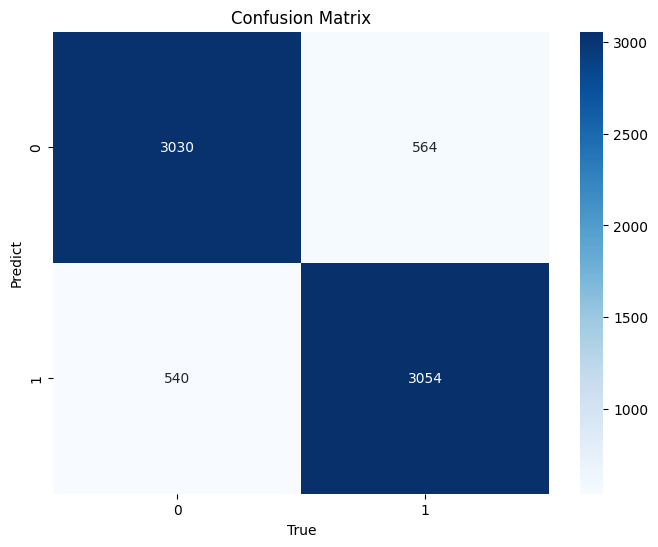

In [43]:
# Import library yang diperlukan
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat confusion matrix
cm = confusion_matrix(y_test_normal, y_pred_class_normal)

# Membuat plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()